# Data Smasher Product EDA (2023)

> # Summary
>Summarized below are the highlights from the key findings from this analysis. Based on the 12 month period in 2023:
>
>General Performance Report
>* Total revenue for Data Smasher in 2023 is 59946.2320 dollars. It is profitable, with total net profit at 15672.3570 dollars. This put Data Smasher's profit margin at 26 %.
>* Throughout 2023, revenue growth has been positive, though fluctuation is quite significant. On April was growth was close to zero, at around 0.2%, while the previous month in March saw the highest growth at around 36%. By December the CMGR is around 9% growth. On average, CMGR is around 14.5%.
>* On average, Data Smasher have around 54 users each month, with 18 being active. There is a 79% likelihood of users churning in the next month.
>
>Monthly Cohort Analysis
>* Retention rate for most cohorts falls off completely at some months and will slightly increase towards Q4 at around 30% retention rate. 
>* No NDR rates are above 100% for Data Smasher, with most rates below 40%. However, in terms of user engagement and revenue, March cohort is relatively significant. Retention never completely fall off and it has the highest number of active users (15 users and retaining at 5 in December). It has had 2 months of consistent high NDR rates (99.04% and 98.39%) and generated around 13k in revenue by December. 
>* No negative profit values can be observed for Data Smasher.
>
>Profitability
>* Pre-discounts, Data Smasher consistently showed positive profits, peaking in September, then gradually declining towards the end of the year. 
>* From January (565.9294) to March (1266.5834), profits steadily increased, dipped in April (523.8689), then rebounded significantly, peaking in September as the highest monthly profit of the year (3507.3637). Post-peak, there was a gradual decrease in profits, with October (1254.6034) and November (2494.4649) seeing lower profits, though still relatively high. December's profits (1789.9762) suggest a stabilizing trend after the peak months.
>
>Discounting EDA
>* There were 275 invoices for Data Smasher in 2023, 99 of which were applied discounts (36%). This indicate that Data Smasher sells well at its regular price.
>* September remains the highest month for profits after discounts, with a post-discount profit of 2957.3407, slightly reduced by 550.02 from the pre-discount profit of 3507.36.
>* Use of a uniform 20% discount shows effectiveness but suggests room for optimization, as discounted profits are more stable but less profitable compared to non-discounted profits. Further research is needed to determine the optimum discount level.
>
>Ideal Customer Profile (ICP) EDA
>* Strategic segment is the top performer, driving 40.35% of net revenue and 40.24% of sales, with a net profit of 5,920.56, even higher at 7,107.47 before discounts. They are financially efficient and impactful. SMBs follow closely, driving 38.03% of net revenue and 38.28% of sales, with a net profit of 5,764.66, even higher at 7,097.87 before discounts. Despite a lead from both segments, Enterprise (21.63% net revenue, 21.48% sales, 3,987.14 net profit) also contributes significantly. Abandoning it could mean lost opportunities. A balanced strategy focusing on the Strategic and SMB segments, while improving the Enterprise segment is the best approach.
>* In the Strategic segment, Tech in AMER, Energy in AMER, Finance in AMER, Consumer Products in EMEA, Finance in EMEA, Manufacturing in APJ are the highest performing industries. They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.
>* For the SMB segment, Energy in AMER, Finance in AMER, Manufacturing in AMER, Finance in EMEA, Retail in AMER, Healthcare in AMER, and Communications in EMEA are top-performing. In the Enterprise segment, Healthcare in AMER, Tech in AMER, Finance in EMEA, Consumer Products in EMEA, and Retail in EMEA stand out.
>* AMER stands out with the highest sales and net profits, managing significant positive profits even before discounts.
>* EMEA contributes substantial sales and net profits, showing strong performance during peak months but requires targeted strategies to address variability and discount impacts.
>* APJ generally shows lower sales and net profits compared to AMER and EMEA, with inconsistent performance and notable dips in February and June.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')
pd.set_option('display.max_columns',30)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
df = pd.read_csv('SaaS-Sales.csv')
df=df.drop('Row ID',axis=1)
df=df[[ 
        'Order ID',                        
        'Order Date',              
        'Date Key',                
    #'Contact Name',            
        'Customer ID',                
        'Customer',               
        'Segment',                 
        'Industry',                
        'Region',                 
        'Subregion', 
        'Country', 
        'City', 
    #'License',   
        'Product',
        'Sales', 
        'Quantity', 
        'Discount', 
        'Profit']]

In [3]:
# Rekayasa fitur dan pembuatan kolom2 baru untuk keperluan analisis bisnis

# nilai diskon dalam bentuk dolar 
df['total_discount_in_dollars']=df['Sales'] * df['Discount']

# nilai sales satu unit produk
df['selling_price']=df['Sales'] / df['Quantity'] 

# net profit sebelum penerapan diskon
df['(net)_profit_before_discount']=df['Sales'] * df['Discount'] + df['Profit']

# net profit untuk penjualan 1 unit produk
df['net_profit_per_unit_sold']=df['Profit'] / df['Quantity'] 

# ubah nama kolom Profit menjadi 'net_profit'
df=df.rename(columns={'Profit':'net_profit'}) 

# melihat profit margin, idealnya SaaS diatas 20%
df['profit_margin']=df['net_profit'] / df['Sales'] * 100 

# pertimbangan nilai sales dari penerapan diskon
df['discounted_sales']=df['Sales'] - (df['Discount']*df['Sales']) 

In [4]:
# Rekayasa fitur, mengubah dari tipe data objek menjadi tipe data datetime untuk ekstraksi tahun dan bulan
df['Order Date'] = pd.DatetimeIndex(df['Order Date'])
df['month']=df['Order Date'].dt.month
df['year']=df['Order Date'].dt.year
df['year_month'] = df['Order Date'].dt.to_period('M')

------------

In [5]:
# for later cohort analysis, make a template for monthly period to see user activity by months
min_month = df['Order Date'].values.astype('datetime64[M]').min()
max_month = df['Order Date'].values.astype('datetime64[M]').max()
template_table = pd.DataFrame(pd.date_range(min_month,max_month,freq='MS'))
template_table.columns = ['Month']
# to merge month template with other df, with 'key'
template_table['key'] = 1

In [6]:
#slice main df by product first
prod6 = df.query("Product == 'Data Smasher'")
# then slice product df by year of analysis
prod6_2023=prod6.query('year == 2023')

----

### General Performance Report

In [18]:
# new column in product df to show each customer/user first purchase for the 2023 period, as "reg_date" or registration date
prod6_2023['reg_date'] = prod6_2023.groupby('Customer ID')[['Order Date']].transform('min')

C:\Users\arizk\AppData\Local\Temp\ipykernel_12472\2461705923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod6_2023['reg_date'] = prod6_2023.groupby('Customer ID')[['Order Date']].transform('min')


In [19]:
# make a user df, from the product df
prod6_2023_user = prod6_2023.groupby(['Customer ID','Customer'])['reg_date'].min().reset_index()

In [20]:
# from user df, extract month datetime data, from date of first purchase
prod6_2023_user['reg_month']= prod6_2023_user['reg_date'].values.astype('datetime64[M]')

In [21]:
# with the month template df which only contains full 12 month timeframe, merge with user df
prod6_2023_user['key'] = 1
prod6_2023_user = template_table.merge(prod6_2023_user,on='key')
prod6_2023_user =prod6_2023_user.drop('key',axis=1)

In [22]:
# need to be rid of extra rows now, since merging with a month template means that there are null customer ids which doesn't make sense timewise.
prod6_2023_user = prod6_2023_user[prod6_2023_user['Month']>=prod6_2023_user['reg_month']]

In [23]:
prod6_2023['Month'] = prod6_2023['Order Date'].values.astype('datetime64[M]')
sales_month = prod6_2023.groupby(['Customer ID','Month'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
account = prod6_2023.groupby(['Customer ID','Month'])[['Order ID']].nunique().reset_index()
account.columns = ['Customer ID','Month', 'account']
prod6_2023_user = prod6_2023_user.merge(sales_month,how='left',on=['Customer ID','Month'])
prod6_2023_user = prod6_2023_user.merge(account,how='left',on=['Customer ID','Month'])

C:\Users\arizk\AppData\Local\Temp\ipykernel_12472\2867750329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod6_2023['Month'] = prod6_2023['Order Date'].values.astype('datetime64[M]')


In [24]:
prod6_2023_user['user'] = 1    
prod6_2023_user['new user'] = (prod6_2023_user['reg_month'] == prod6_2023_user['Month']) * 1 
prod6_2023_user['active'] = (prod6_2023_user['Sales'] > 0) * 1   
prod6_2023_user['active_prev'] = (prod6_2023_user.sort_values(by=['Month'], ascending=True)
.groupby(['Customer ID'])['active'].shift(1))
prod6_2023_user['change_status'] = (prod6_2023_user['active'] != prod6_2023_user['active_prev']) * 1
prod6_2023_user['session_id'] = (prod6_2023_user.sort_values(by=['Month'], ascending=True)
                       .groupby(['Customer ID'])['change_status'].cumsum())
prod6_2023_user['inactive'] = (prod6_2023_user['active'] == 0) * 1
prod6_2023_user['month_inactive'] = (prod6_2023_user.sort_values(by=['Month'], ascending=True)
.groupby(['Customer ID','session_id'])['inactive'].cumsum())

In [25]:
#Data Smasher monthly user report (2023)
prod6_2023_report = prod6_2023_user.groupby('Month')[['Quantity', 'account', 'Sales', 'discounted_sales', '(net)_profit_before_discount' ,'net_profit', 'user','new user','active']].agg('sum')
prod6_2023_report

,Quantity,account,Sales,discounted_sales,(net)_profit_before_discount,net_profit,user,new user,active
Month,,,,,,,,,
2023-01-01,51.0000,10.0000,2125.9100,2036.3900,565.9294,476.4094,10,10,10
2023-02-01,16.0000,6.0000,2437.1700,2131.6340,928.8870,623.3510,15,5,5
2023-03-01,79.0000,19.0000,3952.2720,3877.9216,1266.5834,1192.2330,30,15,19
2023-04-01,48.0000,14.0000,2139.8560,1973.0128,523.8689,357.0257,39,9,13
2023-05-01,84.0000,21.0000,3753.1760,3558.4448,1385.6109,1190.8797,50,11,18
2023-06-01,86.0000,16.0000,4848.8340,4548.0212,1328.7303,1027.9175,54,4,14
2023-07-01,76.0000,17.0000,7547.3360,7433.5968,2508.5852,2394.8460,60,6,15
2023-08-01,63.0000,15.0000,4343.1620,4062.7316,1224.5281,944.0977,65,5,14
2023-09-01,177.0000,42.0000,10227.1580,9667.4684,3507.3637,2947.6741,76,11,34


> To use some kind of SaaS KPI metrics from this dataset is quite a task. We need to calculate, among others, churn rate. But since it is a fictional dataset, and there isn't a clear guideline on what defines churn from the company (1 month, 2 month inactive and so on), here I'll just use the total number of old active users divided by total users at the beginning of the month, and using that number to substract 1. This would give an estimate of how many users stop purchasing/not active (churning) on a monthly period. But this doesn't reflect real churn rate as customers who might have churned more than 1 month can be counted as active if they make a purchase. For estimation purposes only. 

In [19]:
prod6_2023_churn = prod6_2023_user.groupby('Month')[['Sales', 'net_profit', 'user','new user','active']].agg('sum')
prod6_2023_churn['old active'] = (prod6_2023_churn['active'] - prod6_2023_churn['new user'])
prod6_2023_churn['user churn'] = ((1 - (prod6_2023_churn['old active'] / prod6_2023_churn['user'].shift(1))) * 100).round()
prod6_2023_churn

,Sales,net_profit,user,new user,active,old active,user churn
Month,,,,,,,
2023-01-01,2125.9100,476.4094,10,10,10,0,NaN
2023-02-01,2437.1700,623.3510,15,5,5,0,100.0000
2023-03-01,3952.2720,1192.2330,30,15,19,4,73.0000
2023-04-01,2139.8560,357.0257,39,9,13,4,87.0000
2023-05-01,3753.1760,1190.8797,50,11,18,7,82.0000
2023-06-01,4848.8340,1027.9175,54,4,14,10,80.0000
2023-07-01,7547.3360,2394.8460,60,6,15,9,83.0000
2023-08-01,4343.1620,944.0977,65,5,14,9,85.0000
2023-09-01,10227.1580,2947.6741,76,11,34,23,65.0000


>Here we can see that user churn is abnormally high, as SaaS monthly churn rate is usually only 5-10%. But the reality is such. As the dataset fictional, and there isn't any kind of subscription data, we can leave it as is. Furthermore, it should be noted that the lack of any subcription data makes it unrealistic to do a recurring revenue KPI (average revenue per user, monthly recurring revenue, etc).

In [20]:
#monthly avg. user churn
prod6_2023_churn[["user", "active", "user churn"]].mean()

user         54.3333
active       18.2500
user churn   79.4545
dtype: float64

In [21]:
prod6_2023_churn[["new user"]].mean()

new user   7.2500
dtype: float64

In [37]:
# calculating Compound Monthly Growth Rate (CMGR) for the past 12 month
sales_report=pd.DataFrame(prod6_2023.groupby(['month'])[['Sales', 'net_profit']].sum()).reset_index()

for ind, row in sales_report.iterrows():
    sales_report.loc[ind, "month difference"] = row['month'] - 1

sales_report['CMGR'] = np.power(sales_report['Sales'] / 2125.9100, #<---first month sales
(1 / sales_report['month difference'])) - 1
sales_report ['CMGR'] = (sales_report ['CMGR']) * 100
sales_report = sales_report.drop(['month difference'], axis=1)

sales_report

,month,Sales,net_profit,CMGR
0,1,2125.9100,476.4094,0.0000
1,2,2437.1700,623.3510,14.6413
2,3,3952.2720,1192.2330,36.3487
3,4,2139.8560,357.0257,0.2182
4,5,3753.1760,1190.8797,15.2693
5,6,4848.8340,1027.9175,17.9284
6,7,7547.3360,2394.8460,23.5117
7,8,4343.1620,944.0977,10.7447
8,9,10227.1580,2947.6741,21.6960
9,10,5192.0420,956.5250,10.4303


In [25]:
# CMGR doesn't reflect all months growth rate, so Im going to use mean or median.
sales_report['CMGR'].skew()

0.5880387747626764

In [26]:
# The CMGR is very close to being normally distributed
sales_report['CMGR'].mean()

14.483350809231

In [27]:
prod6_2023[['Sales', 'net_profit']].sum()

Sales        59946.2320
net_profit   15672.3570
dtype: float64

In [28]:
# Total monthly profit margin
(15672.3570/ 59946.2320) * 100

26.144023530953536

In [39]:
sales_report[['Sales', 'net_profit']].corr()

,Sales,net_profit
Sales,1.0000,0.9647
net_profit,0.9647,1.0000


**Key findings:**
1. On average, Data Smasher have around 54 users each month, with 18 being active. There is a 79% likelihood of users churning in the next month. Number of accounts and quantity of purchases tend to increase by the end of the year starting from September. Each month number of new users fluctuates, with certain months having more new users (March has 15 new users, highest for Data Smasher in 2023).
2. Throughout 2023, revenue growth has been positive, though fluctuation is quite significant. On April was growth was close to zero, at  around 0.2%, while the previous month in March saw the highest growth at around 36%. By December the CMGR is around 9% growth. On average, CMGR is around 14.5%.
3. Total revenue for Data Smasher in 2023 is 59946.2320 dollars. It is profitable, with total net profit at 15672.3570 dollars. This put Data Smasher's profit margin at 26 %.
4. Based on total monthly data, increase in monthly revenue for Data Smasher seems to equal an increase in monthly profit. Using a correlation test, we can see that there is a strong positive correlation between revenue and profit.

### Monthly Cohort Analysis

In [26]:
# Retention user
from operator import attrgetter
#----------------------------
# treat the month of registration as cohort
prod6_2023_user['date']=prod6_2023_user['Month'].dt.to_period('M')
prod6_2023_user['cohort']= prod6_2023_user['reg_month'].dt.to_period('M')
prod6_2023_user['lifetime'] = (prod6_2023_user['date'] - prod6_2023_user['cohort']).apply(attrgetter('n'))

In [16]:
prod6_2023_user.head(2)

,Month,Customer ID,Customer,reg_date,reg_month,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit,account,user,new user,active,active_prev,change_status,session_id,inactive,month_inactive,date,cohort,lifetime
0,2023-01-01,1002,Aetna,2023-01-16,2023-01-01,10.0000,110.5760,88.4608,49.8112,27.6960,1.0000,1,1,1,NaN,1,1,0,0,2023-01,2023-01,0
1,2023-01-01,1020,Citigroup,2023-01-29,2023-01-01,3.0000,239.9700,239.9700,26.3967,26.3967,1.0000,1,1,1,NaN,1,1,0,0,2023-01,2023-01,0


In [15]:
prod6_cohort = prod6_2023_user.groupby(['reg_month', 'lifetime'], as_index=False)[['user','new user','active']].agg('sum')
prod6_cohort ['active rate'] = (prod6_cohort['active'] / prod6_cohort['user']) * 100
prod6_cohort

,reg_month,lifetime,user,new user,active,active rate
0,2023-01-01,0,10,10,10,100.0000
1,2023-01-01,1,10,0,0,0.0000
2,2023-01-01,2,10,0,1,10.0000
3,2023-01-01,3,10,0,2,20.0000
4,2023-01-01,4,10,0,0,0.0000
...,...,...,...,...,...,...
73,2023-10-01,1,6,0,2,33.3333
74,2023-10-01,2,6,0,2,33.3333
75,2023-11-01,0,2,2,2,100.0000
76,2023-11-01,1,2,0,0,0.0000


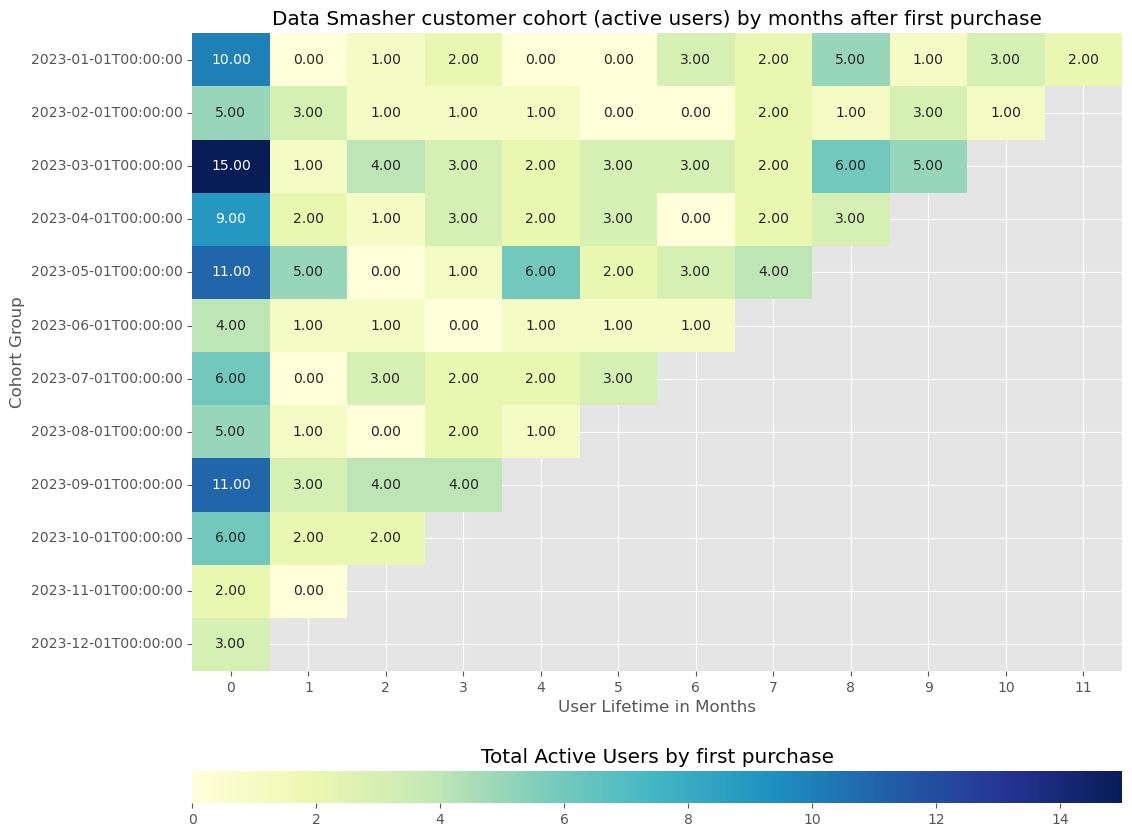

In [18]:
# customer cohort
pivot0 =prod6_cohort.pivot_table(index='reg_month', columns='lifetime', values= 'active')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot0,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='YlGnBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Data Smasher customer cohort (active users) by months after first purchase',
    xlabel='User Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Total Active Users by first purchase'
)

plt.show()

- Highest number of users in the initial month can be observed in the March cohort (15 active users).
- Generally for cohorts, active user numbers fall significantly after initial month to 1-2 users, regardless of the number of users in the initial months.

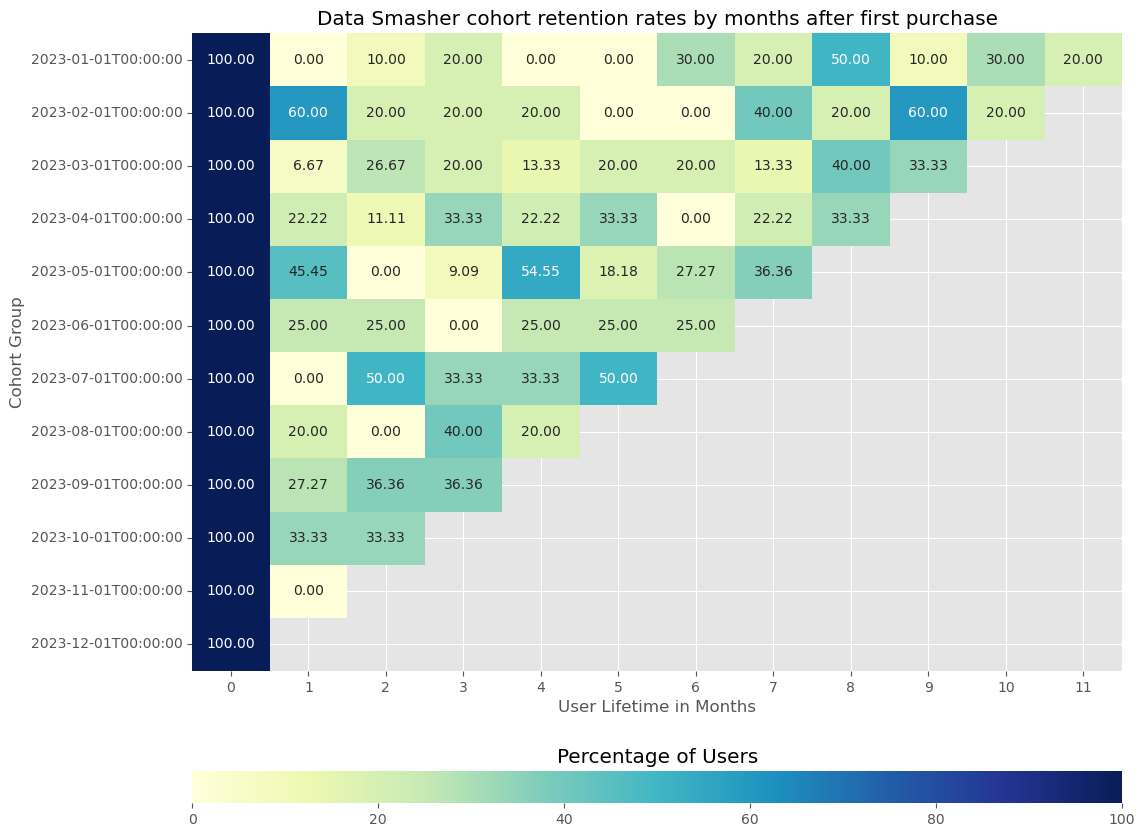

In [20]:
# customer retention
pivot1 =prod6_cohort.pivot_table(index='reg_month', columns='lifetime', values= 'active rate')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot1,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='YlGnBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Data Smasher cohort retention rates by months after first purchase',
    xlabel='User Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Percentage of Users'
)

plt.show()

- We can see that retention rate for some cohort falls off completely at some months for most cohort.
- Generally, retention rate will slightly increase during September, November, and/or December. But nowhere near the rate of the initial purchase month, at around 30% retention rate.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

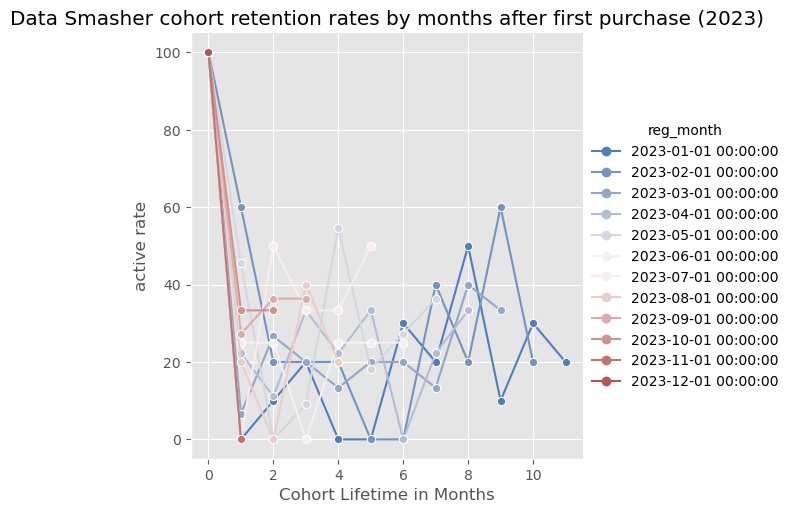

In [21]:
# retention rate lineplots
sns.relplot(data=prod6_cohort, x="lifetime", y="active rate",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Data Smasher cohort retention rates by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

In [27]:
prod6_cohort2 =prod6_2023_user.groupby(['reg_month', 'lifetime'], as_index=False)[['Quantity', 'account', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].agg('sum') 

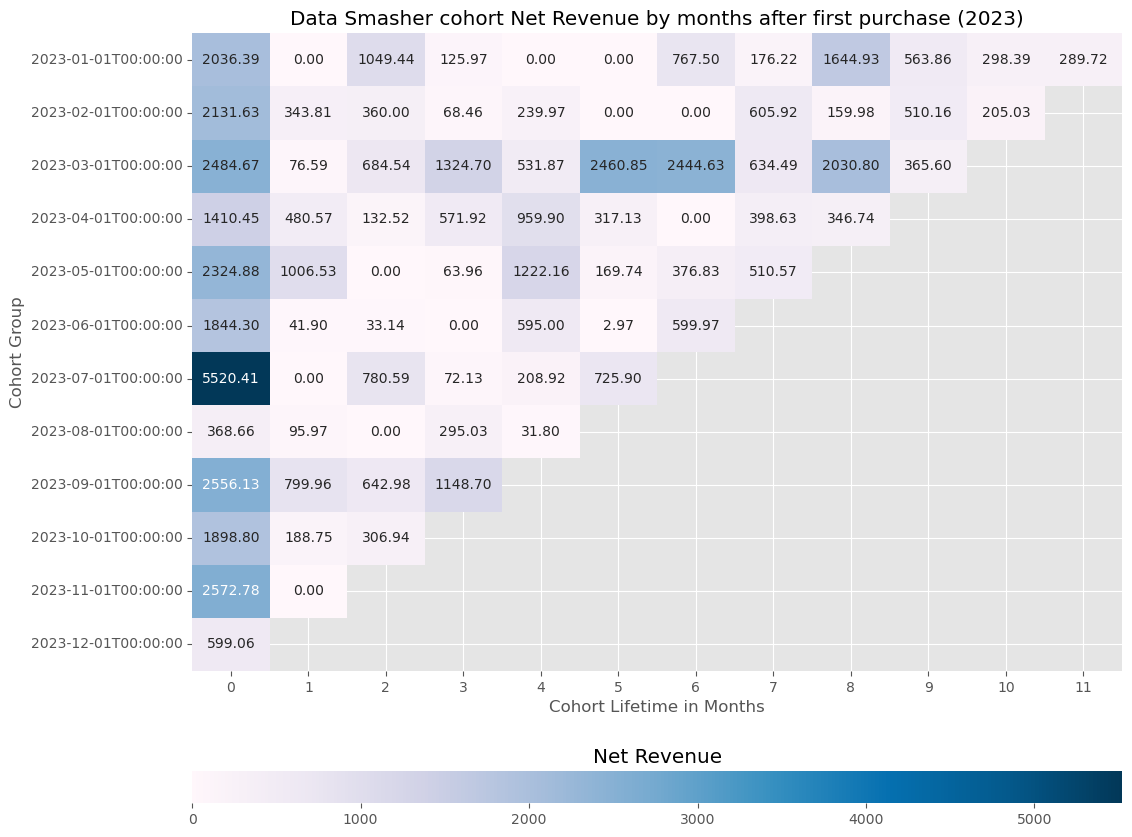

In [23]:
# Net Revenue by Cohort
pivot2 =prod6_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'discounted_sales')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot2,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Data Smasher cohort Net Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Net Revenue'
)

plt.show()

- Generally for cohorts, subsequent purchases are inconsistent in value, with some cohort having months with no purchases.
- No cohort have subsequent purchases that exceed the initial month's purchase. Most cohorts have their highest purchase in their initial month at around 1.5-2.5k
- July cohort has the highest initial purchase at 5520.41.
- March cohort has a series of relatively significant subsequent purchases. 

In [28]:
# calculating Net Dollar Retention (NDR), using initial month summed discounted sales
ds_max = prod6_2023_user.loc[prod6_2023_user['lifetime'] <= 0].groupby('reg_month')['discounted_sales'].sum().to_frame('ds_max')
prod6_cohort2 = prod6_cohort2.merge(ds_max,how='left',on=['reg_month'])
prod6_cohort2 ['net dollar retention'] = (prod6_cohort2['discounted_sales'] / prod6_cohort2['ds_max']) * 100

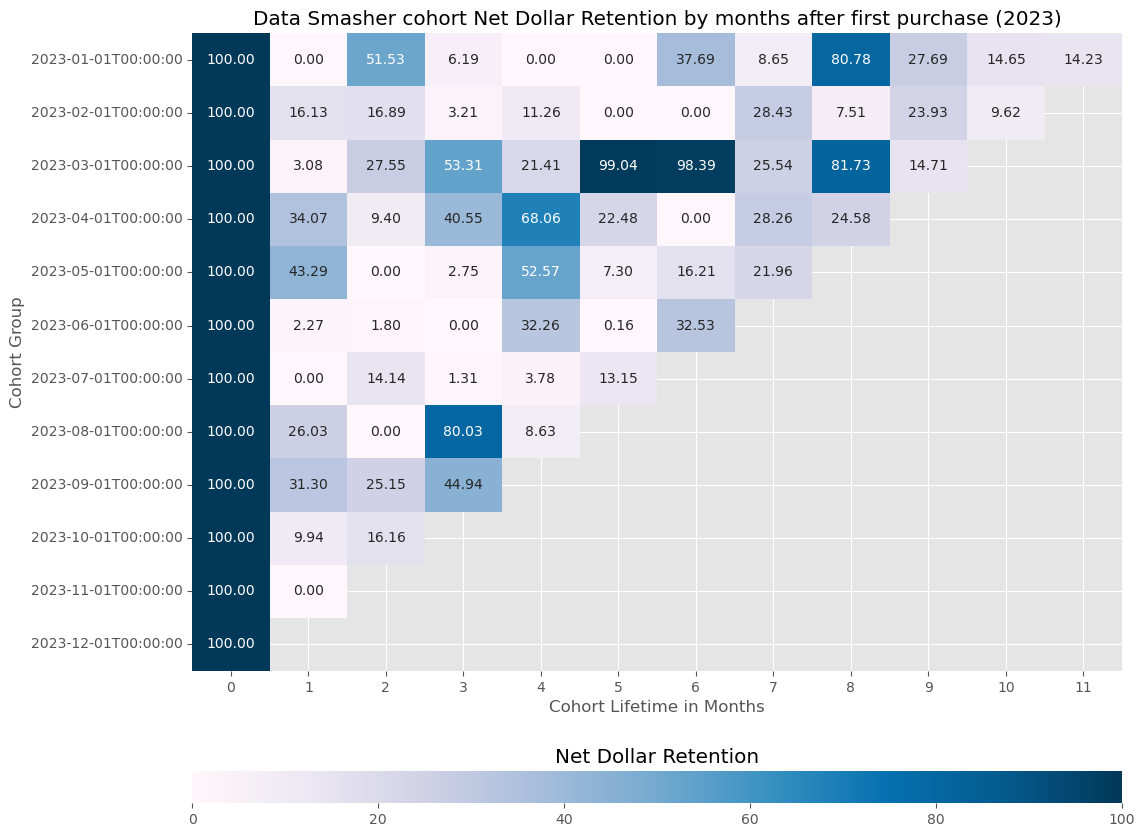

In [25]:
# Net Dollar/Revenue Retention
pivot3 =prod6_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'net dollar retention')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot3,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Data Smasher cohort Net Dollar Retention by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Net Dollar Retention'
)

plt.show()

*Notes
- in SaaS, especially B2B, NDR is extremely important. An NDR above 110% are, among other things, signs of underpricing (meaning that your product value is more than you realize, that some companies are getting more value out of your product than the value they could give to you). Its is also a sign of cohort growth, and that companies should try upselling, improving their products and getting more users on top of their growing existing users.
- under 100%, especially for Enterprise-level B2B SaaS, means that there is something wrong. Customer churn, they don't love the product. Rather than trying to get new users (investing in sales and marketing), B2B SaaS should try to ask their customers on why they're churning and invest on product improvement.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

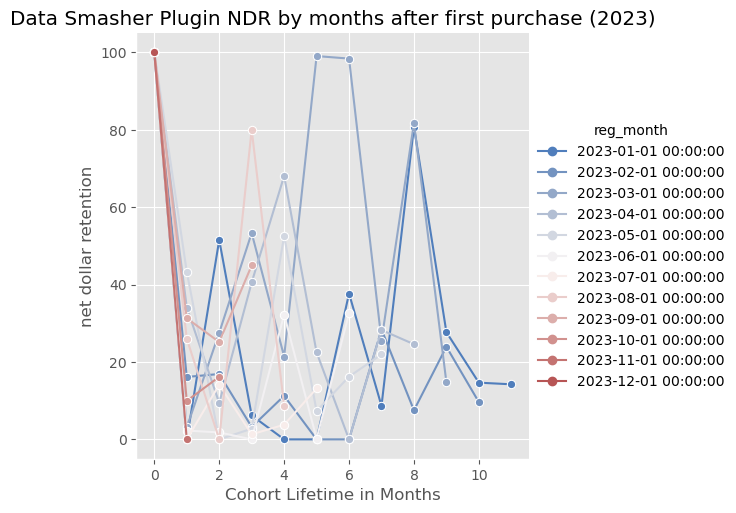

In [19]:
# some data are easier to read with a different chart- NDR lineplots
sns.relplot(data=prod6_cohort2, x="lifetime", y="net dollar retention",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Data Smasher Plugin NDR by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- no NDR rates are above 100% for Data Smasher, with most rates below 40%.
- Best NDR rates can be found in the March cohort, which had 2 months of consistent high NDR rates (99.04% and 98.39%); in August and September.

In [29]:
prod6_cohort2 ['cumulative lifetime revenue'] = prod6_cohort2.groupby(['reg_month'])['discounted_sales'].cumsum()

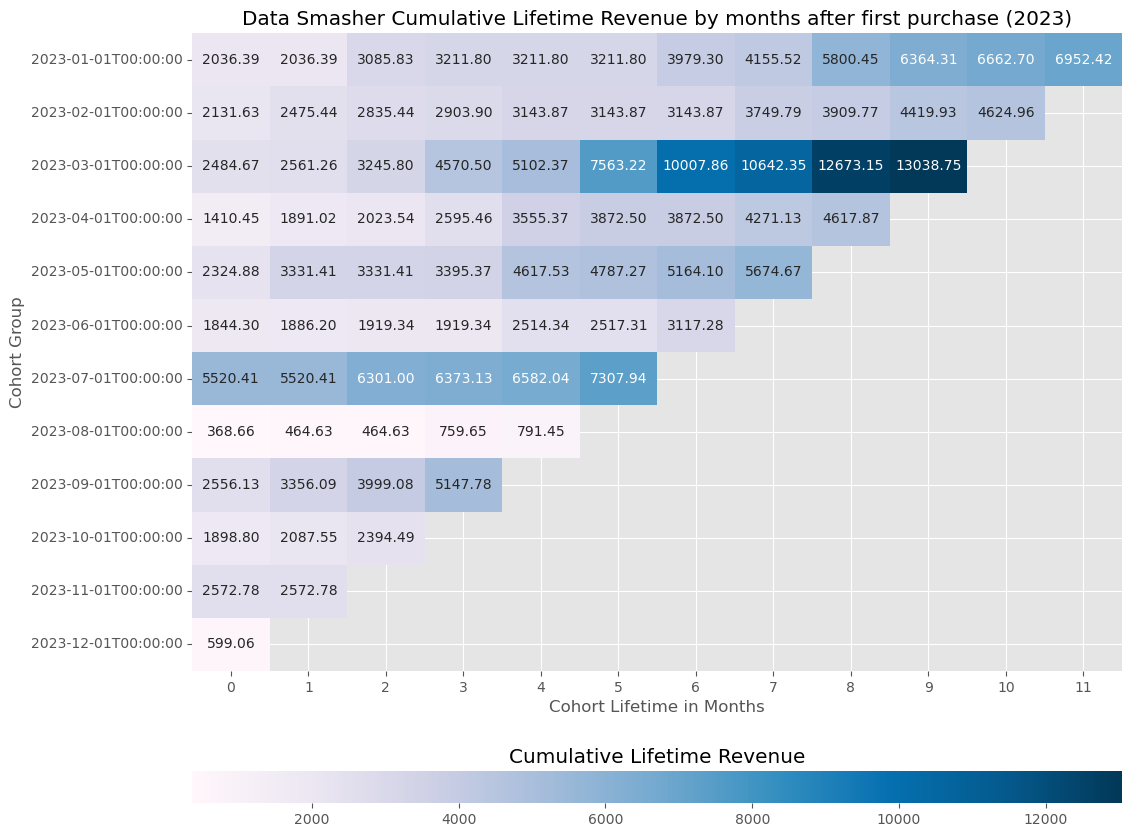

In [27]:
# cumulative lifetime revenue by cohort
pivot4 =prod6_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'cumulative lifetime revenue')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot4,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Data Smasher Cumulative Lifetime Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Cumulative Lifetime Revenue'
)

plt.show()

Cumulative lifetime revenue adds up all the revenue purchases starting from the initial purchase, so that by the end of the month (and by subsequents months), you can see totals of revenue purchases.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

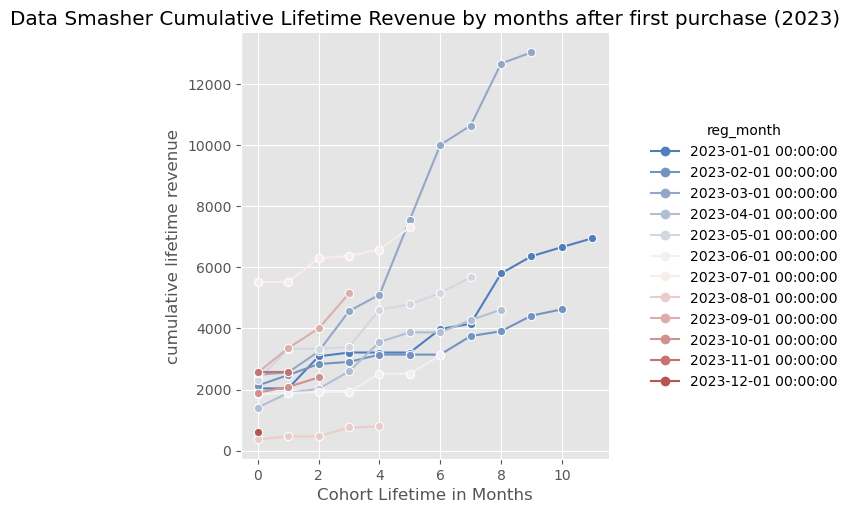

In [ ]:
#  cumulative lifetime revenue lineplots
sns.relplot(data=prod6_cohort2 , x="lifetime", y="cumulative lifetime revenue",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Data Smasher Cumulative Lifetime Revenue by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- We can see one cohort standing out above the rest in cumulative revenue, the March cohort. It generated around 13k in revenue by December.

In [30]:
# calculating Customer Lifetime Revenue, using initial month number of active users
user_max = prod6_2023_user.loc[prod6_2023_user['lifetime'] <= 0].groupby('reg_month')['active'].sum().to_frame('user_max')
prod6_cohort2 = prod6_cohort2.merge(user_max,how='left',on=['reg_month'])
prod6_cohort2 ['customer lifetime revenue'] = (prod6_cohort2['cumulative lifetime revenue'] / prod6_cohort2['user_max'])

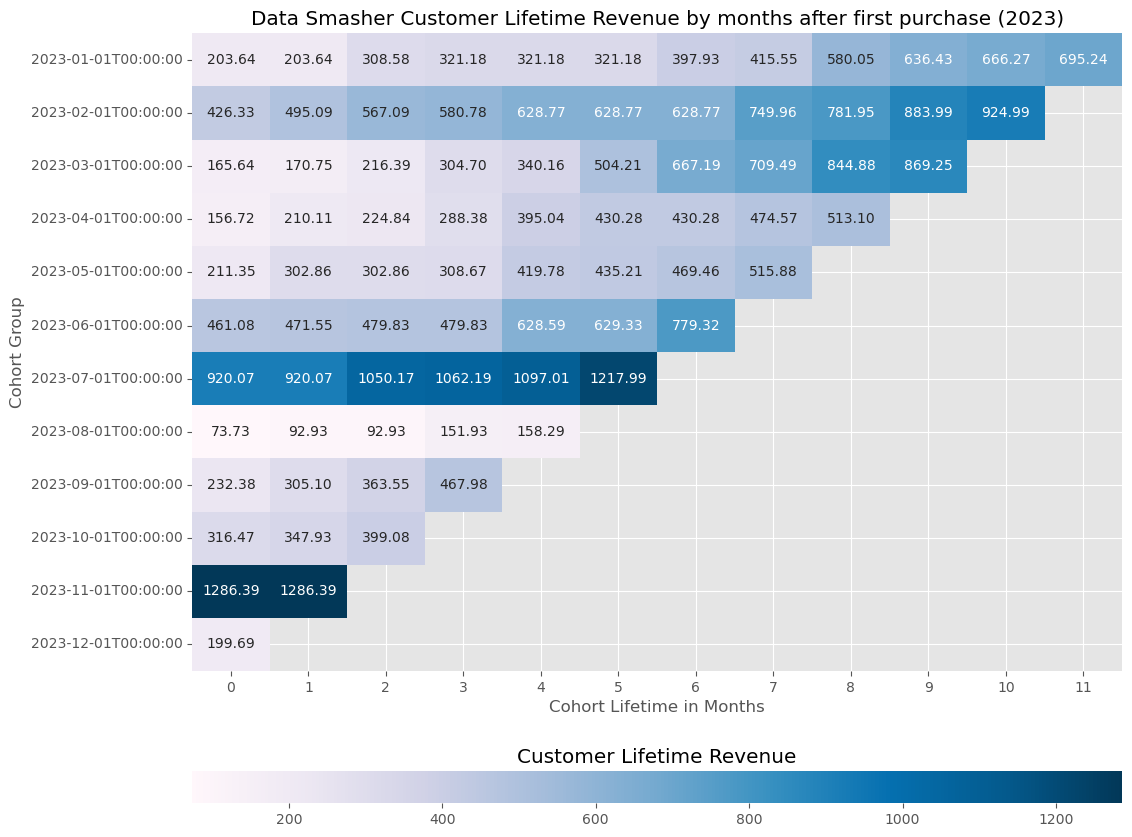

In [29]:
# per user Customer Lifetime Revenue, by cohort
pivot5 =prod6_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'customer lifetime revenue')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot5,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Data Smasher Customer Lifetime Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Customer Lifetime Revenue'
)

plt.show()

Customer Lifetime Revenue gives an average of how much each customer in the cohort spends each month (on a per-customer basis).

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

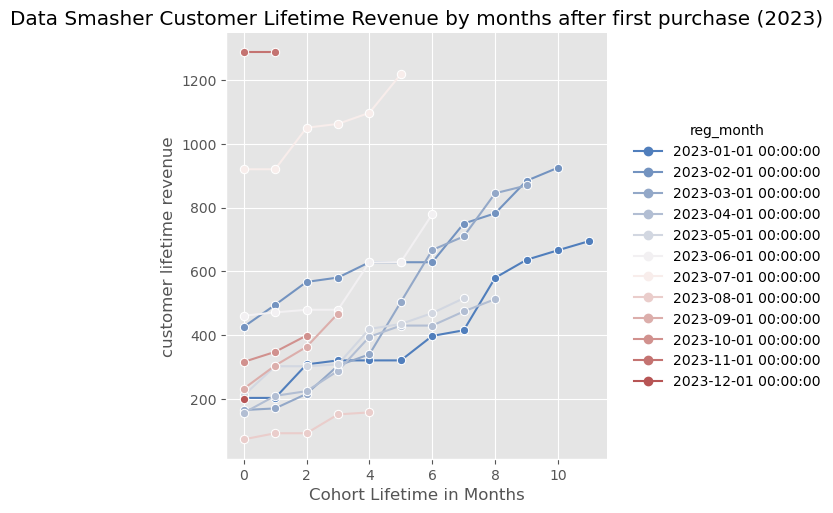

In [22]:
#  customer lifetime revenue lineplots
sns.relplot(data=prod6_cohort2, x="lifetime", y="customer lifetime revenue",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Data Smasher Customer Lifetime Revenue by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- Generally, Data Smasher cohorts in 2023 are upwards trending, but subsequent purchases aren't significant enough to make cumulative value differ much from its initial purchase.
- Due to a high initial purchase, the November cohort has the highest per-user value (1286.39). However, we can see that it didn't make any purchases at all in December, making this cohort seem somewhat stagnant.
- Though it isn't the highest in per-user value, the July cohort has steady purchases from its initial per-user purchase (920.07), where by December its per-user value has reached 1217.99.

In [31]:
# CLV - but with net profit
prod6_cohort2 ['cum_net_profit'] = prod6_cohort2.groupby(['reg_month'])['net_profit'].cumsum()
# calculating Customer Lifetime Value, using initial month number of active users
prod6_cohort2 ['Customer Lifetime Value'] = (prod6_cohort2['cum_net_profit'] / prod6_cohort2['user_max'])

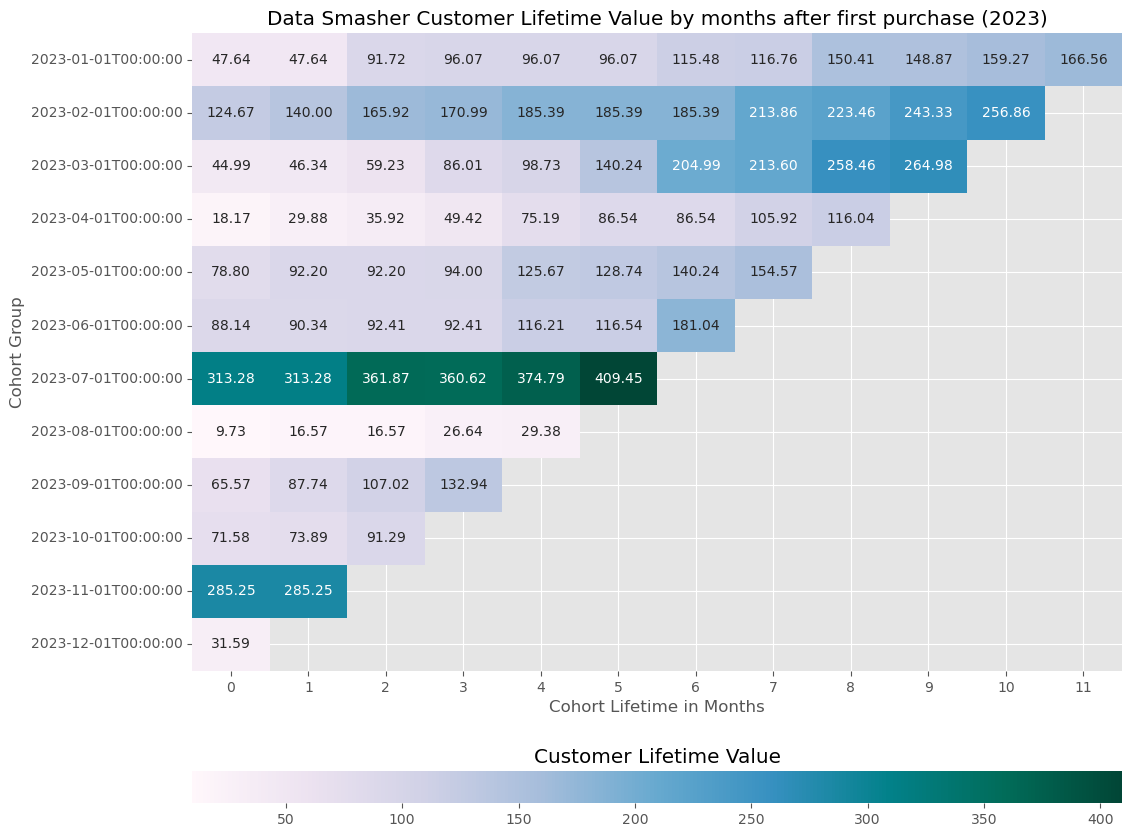

In [31]:
# Customer Lifetime Value, by cohort
pivot6 =prod6_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'Customer Lifetime Value')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot6,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBuGn',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Data Smasher Customer Lifetime Value by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Customer Lifetime Value'
)

plt.show()

>Notes
>- Customer Lifetime Value (CLV), looks at profit instead of revenue, on a per user basis.
>- Usually, "profit" used in CLV calculation is Gross Profit, which is Revenue - Cost of Goods (cost of producing a product). Gross Profit is used to get Gross Margin rate (Gross Profit/Revenue), which then is multiplied with the Customer Lifetime Revenue to get the CLV values. CLV then reflect the profit gained on a per-user basis, after considering the production cost of a product.
>- In this dataset, however, there is no Cost of Goods Sold (COGS) data or any "expenses" data. We only have "net profit" which is Gross Profit - Other Expenses (marketing, overhead cost, taxes, etc), and so will use that in place of Gross Profit. So CLV here will be profit gained on a per-user basis after considering ALL expenses, including those not related to production cost. 
>- Lumping all expenses together may simplify things, but can provide distortion of data and less insights in real world cases. In SaaS, usually expenses not relating to production cost is related to Customer Acquisition Cost (CAC), and is used to calculate actual profit from users or customers. With CAC, you can ask questions such as: how much can we spend on getting customers, when we have a profit of ... from producing a product? Or, within context of this dataset, how much discount can we afford to actually make the most profit?

>Without expenses data, it is harder to gain accurate insights on profit and how to be accountable with profit, but its the data we have.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

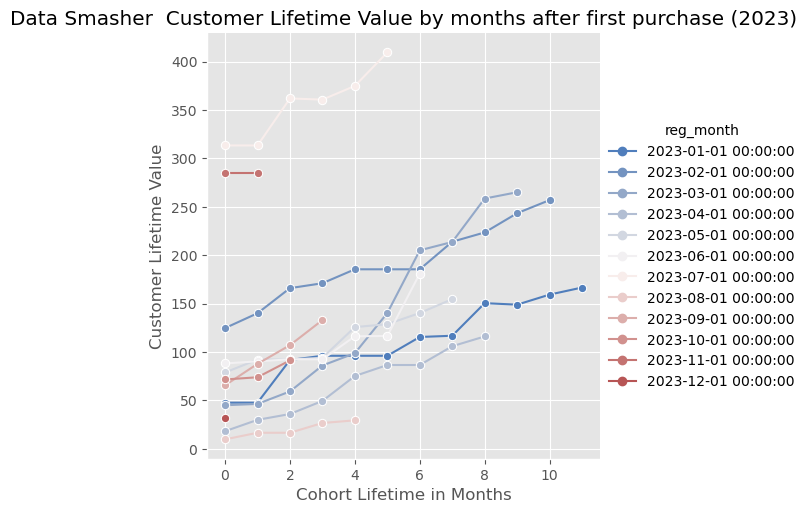

In [22]:
#  customer lifetime value lineplots
sns.relplot(data=prod6_cohort2, x="lifetime", y="Customer Lifetime Value",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Data Smasher  Customer Lifetime Value by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

-  It can be observed that there are no negative profit values per user in the cohorts, meaning that Data Smasher is contributing profit.
- July cohort provide the highest profits from all the cohorts per user (409.45 per user by December). Based on the CLV, this cohort show the most promise. However, since this CLV value is made using net profit instead of gross profit, here Costumer Acquisition Cost (CAC) is assumed to be already accounted for. Usually, CLV values (calculated with gross profit) is measured against CAC to see the actual value of a customer. Since CAC data doesn't exist in this dataset and is taked as granted, CLV of July cohort should not be taken at face value. Just for estimation purposes.

**Key findings:**
1. Retention rate for most cohorts falls off completely at some months and will slightly increase towards Q4 at around 30% retention rate. 
2. Most cohorts have their highest purchase in their initial month at around 1.5-2.5k. 
3. No NDR rates are above 100% for Data Smasher, with most rates below 40%. 
4. In terms of user engagement and revenue, March cohort is relatively significant. Retention never completely fall off and it has the highest number of active users (15 users and retaining at 5 in December). It has had 2 months of consistent high NDR rates (99.04% and 98.39%) and generated around 13k in revenue by December. 
5. In terms of profit, July cohort provide the highest profits from all the cohorts per user (409.45 per user by December).
6. No negative profit values can be observed for Data Smasher.

### Profitability

In [32]:
# Calculating good & bad sales; positive and negative profit before discount was applied
pre_discount_negatives = prod6_2023[prod6_2023['(net)_profit_before_discount'] < 0]
pre_discount_positives = prod6_2023[prod6_2023['(net)_profit_before_discount'] > 0]
# Negative profit
negatives = pre_discount_negatives.groupby('month')['(net)_profit_before_discount'].sum().reset_index()
negatives.columns = ['month', 'negative profits before discount']
# Positive profit
positives = pre_discount_positives.groupby('month')['(net)_profit_before_discount'].sum().reset_index()
positives.columns = ['month', 'positive profits before discount']
# Merge
plus_minus = pd.merge(negatives, positives, on='month', how='outer')
plus_minus
# Turn negative values to positive for easier visuals
plus_minus['negative profits before discount'] = plus_minus['negative profits before discount'].abs()
# Sort by month to ensure correct order
plus_minus = plus_minus.sort_values(by='month')

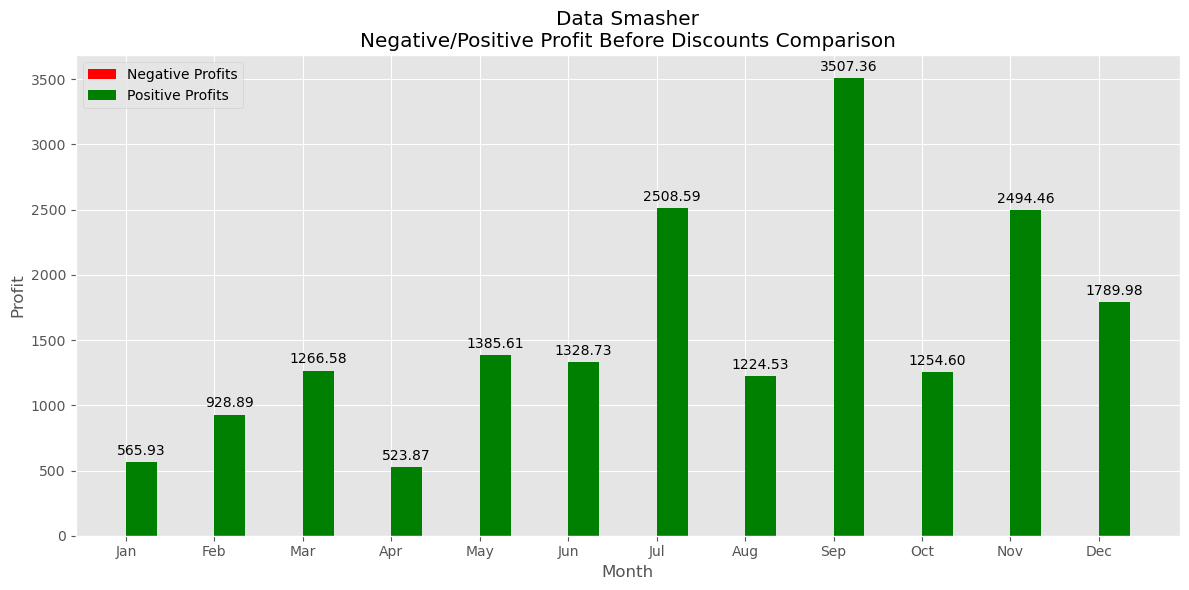

In [37]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(plus_minus['month']))

# Plot negative and positive profits side-by-side
bar1 = plt.bar(index - bar_width/2, plus_minus['negative profits before discount'], bar_width, label='Negative Profits', color='r')
bar2 = plt.bar(index + bar_width/2, plus_minus['positive profits before discount'], bar_width, label='Positive Profits', color='g')

# Annotate bars
for rect in bar1 + bar2:
    height = rect.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords='offset points', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Data Smasher\nNegative/Positive Profit Before Discounts Comparison')
plt.xticks(ticks=np.arange(len(plus_minus)), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.legend(loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

>"Before Discounts" reflects a theoretical scenario assuming sales were made without discounts. This represents a potential profit scenario assuming all sales happened at full price.

**Key findings:**
1. Pre-discounts, Data Smasher consistently showed positive profits, peaking in September, then gradually declining towards the end of the year. 
2. From January (565.9294) to March (1266.5834), profits steadily increased, dipped in April (523.8689), then rebounded significantly, peaking in September as the highest monthly profit of the year (3507.3637).
3. Post-peak, there was a gradual decrease in profits, with October (1254.6034) and November (2494.4649) seeing lower profits, though still relatively high. December's profits (1789.9762) suggest a stabilizing trend after the peak months.

### Discounting EDA

In [38]:
# profits that went negative because of discount + positive profits after discount 
post_discount_negatives = prod6_2023[(prod6_2023['net_profit'] < 0)]
post_discount_positives = prod6_2023[(prod6_2023['net_profit'] > 0)]
# negative profit
negatives2 = post_discount_negatives.groupby('month')['net_profit'].sum().reset_index()
negatives2.columns = ['month', 'negative profits after discount']
# positive profit
positives2 = post_discount_positives.groupby('month')['net_profit'].sum().reset_index()
positives2.columns = ['month', 'positive profits after discount']
# merge
plus_minus2 = pd.merge(negatives2, positives2, on='month', how='outer')
plus_minus2
# turn negative values to positive for easier visuals
plus_minus2['negative profits after discount'] = plus_minus2['negative profits after discount'].abs()
# Sort by month to ensure correct order
plus_minus2 = plus_minus2.sort_values(by='month')

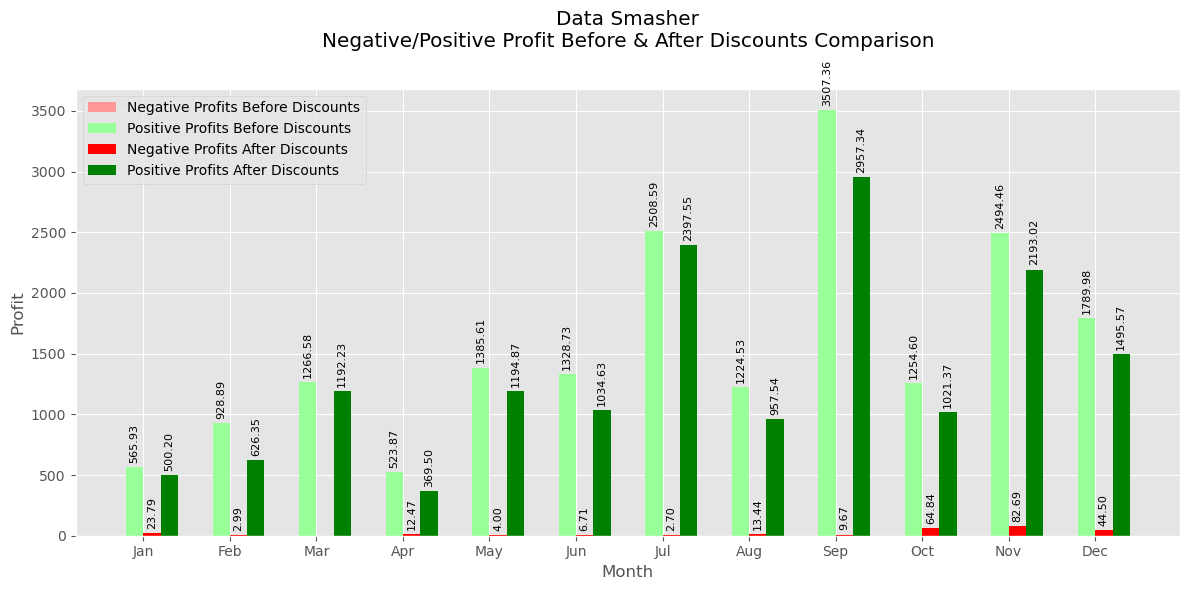

In [40]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(plus_minus['month']))

# Lighter shades of red and green
lighter_green = '#99ff99'
lighter_red = '#ff9999'

# Plot negative and positive profits side-by-side
bar1 = plt.bar(index - bar_width*1.5, plus_minus['negative profits before discount'], bar_width, label='Negative Profits Before Discounts', color=lighter_red)
bar2 = plt.bar(index - bar_width*0.5, plus_minus['positive profits before discount'], bar_width, label='Positive Profits Before Discounts', color=lighter_green)
bar3 = plt.bar(index + bar_width*0.5, plus_minus2['negative profits after discount'], bar_width, label='Negative Profits After Discounts', color='r')
bar4 = plt.bar(index + bar_width*1.5, plus_minus2['positive profits after discount'], bar_width, label='Positive Profits After Discounts', color='g')

# Annotate bars
for rect in bar1 + bar2 + bar3 + bar4:
    height = rect.get_height() 
    plt.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height), 
                 xytext=(0, 3), # 3 points vertical offset 
                 textcoords='offset points', ha='center', va='bottom', fontsize=8, rotation=90)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Data Smasher\nNegative/Positive Profit Before & After Discounts Comparison',  pad=30)
plt.xticks(ticks=np.arange(len(plus_minus2)), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend(loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

>"After Discounts" reflect actual profit accounting for discounts, showing real-world profit outcomes.

In [42]:
3507.36 - 2957.34

550.02

- After applying discounts, Data Smasher continues to exhibit a similar trend, experiencing minimal negative impact. Positive profits, though slightly reduced, still peak in September and then gradually decline towards the end of the year. Minimal impact of discounts suggests that strategic discounting has been effectively implemented without severely affecting overall profitability.
- September remains the highest month for positive profits after discounts at 2957.3407 (being reduced by 550.02 from 3507.36 before discount was accounted).
- Lowest profit can be seen in April, with a reduction in positive profits to 369.4964 (from 523.87), combined with a negative profit of 12.4707, yielding the lowest overall profit of 357.0257.
- Data Smasher demonstrates strong profitability before and after discounts. Minimal negative impact of discounting indicates resilience of the product.

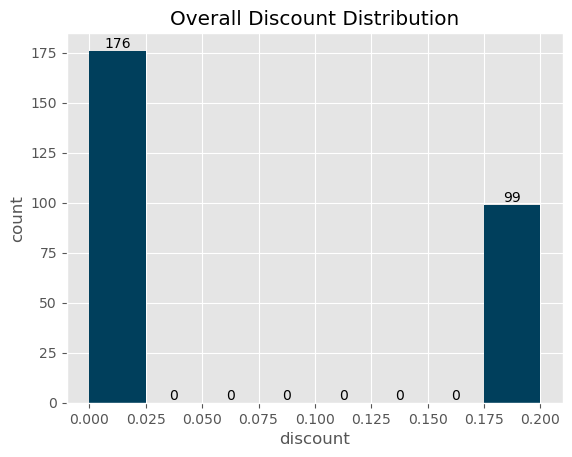

In [43]:
n, bins, patches = plt.hist(data=prod6_2023, x='Discount', bins=8, color='#003f5c')
plt.title('Overall Discount Distribution')
plt.xlabel('discount')
plt.ylabel('count')
# Annotating the bars with count values
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(), 
             str(int(patches[i].get_height())), ha='center', va='bottom', color='black')
plt.show()

- There were 275 invoices for Data Smasher in 2023, 99 of which were applied discounts (36%). We can see that discouting is relatively low for the product, which indicate the product sells well at its regular price.
- 99 orders that were discounted are 20% discounts. No other type of discount exist for Data Smasher. Uniform approach is effective, however there's always room for optimization.

In [44]:
# Range of Discounts (January, April, September, December)
filtered_df = prod6_2023[prod6_2023['month'].isin([1, 4, 9, 12])]

# Aggregate statistics
grouped_data = filtered_df.groupby(['month', 'Discount'])[['net_profit']].agg(['std', 'mean', 'min', 'median', lambda x: x.quantile(0.75), 'max', 'count']).rename(columns={'<lambda_0>': '.75'})

# Flatten the multi-level columns for easier handling
grouped_data.columns = ['std', 'mean', 'min', 'median', '75%', 'max', 'count']
grouped_data = grouped_data.reset_index()

# display
grouped_data.set_index(['month', 'Discount'], inplace=True)
grouped_data.sort_index(level=0, inplace=True)
grouped_data

std    mean      min  median     75%      max  count
month Discount                                                          
1     0.0000    57.8750 65.7865   2.5452 70.3120 98.9883 157.4685      7
      0.2000    13.9399  3.1808 -14.7931 11.9980 13.3008  14.3952      5
4     0.0000    40.1440 36.5375   1.5588 22.6737 46.7313 129.6000      9
      0.2000    11.7230  5.6377  -7.7247  8.3958 11.9196  20.3439      5
9     0.0000   158.1331 80.6627   1.8872 37.7874 63.9840 829.3754     29
      0.2000    44.1832 28.9741  -7.1190 19.7934 33.5892 190.3881     21
12    0.0000    56.8238 52.1705   4.9080 34.9246 59.1888 257.9871     24
      0.2000    27.0208 15.3061 -28.7964 10.5534 25.5968  81.5949     13

> Variability (std): Varying standard deviations across months reflect different business contexts and conditions. Each month presents unique challenges and opportunities that affect profit consistency. For instance, the lower standard deviations in other months suggest more stable and predictable profit patterns.

Data above is the distribution of profit across different discount ranges, for 4 representative months. Reasons choosing particular months are as follows: 
- January: Represents the start of the year with initial profit levels.
- April: Shows one of the lowest profit months, highlighting the impact of discounts on lower performance.
- September: Peak profit month, illustrating maximum performance before and after discounts.
- December: Indicates end-of-year performance, showing how profits stabilize or decline after the peak.

- Minimum values for the 20% discount range are negative across all months: January (-14.7931), April (-7.7247), September (-7.1190), and December (-28.7964). Despite some orders resulting in negative profits, the majority of profits remain positive across the months analyzed. Overall, 20% discounts are effective, as indicated by the comparison with maximum (e.g., January: 14.3952, April: 20.3439, September: 190.3881, December: 81.5949) and 75th percentile (e.g., January: 13.3008, April: 11.9196, September: 33.5892, December: 25.5968) values.
- Given the analysis of the minimal negative profit values, trying a 10% discount could strike a balance between maintaining profitability and offering some price reduction to attract more customers. However, further research is needed to determine the optimum discount level for maximum profitability.
- Discounted profits (20%) show more stability with lower variability (std. dev. 44.1832 vs. 158.1331 in September) but at the cost of reduced profitability (mean 28.9741 vs. 80.6627 in September). Higher stability might be appealing for strategic goals, but lower mean profits suggest non-discounted strategies are more profitable overall (max 190.3881 vs. 829.3754 in September).

**Key findings:**
1. There were 275 invoices for Data Smasher in 2023, 99 of which were applied discounts (36%). This indicate that Data Smasher sells well at its regular price.
2. Despite discounts, the majority of profits remain positive, indicating minimal negative impact on overall profitability (e.g., January: min -14.7931, mean 3.1808; April: min -7.7247, mean 5.6377).
3. September remains the highest month for profits after discounts, with a post-discount profit of 2957.3407, slightly reduced by 550.02 from the pre-discount profit of 3507.36.
4. Use of a uniform 20% discount shows effectiveness but suggests room for optimization, as discounted profits are more stable but less profitable compared to non-discounted profits. Further research is needed to determine the optimum discount level.

### Segmentation EDA

In [8]:
# make a segment df, from the product df
prod6_2023_segment = prod6_2023.groupby(['Segment'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
segment_account = prod6_2023.groupby(['Segment'])[['Order ID']].nunique().reset_index()
segment_account.columns = ['Segment','account']
prod6_2023_percents = segment_account.merge(prod6_2023_segment,how='left',on=['Segment'])
prod6_2023_percents

,Segment,account,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,Enterprise,51,177,12878.3980,12291.7404,4573.7940,3987.1364
1,SMB,126,548,22946.4640,21613.2592,7097.8655,5764.6607
2,Strategic,74,354,24121.3700,22934.4580,7107.4719,5920.5599


In [9]:
# calculate percentage of segment's business share by category
prod6_2023_percents['% Account']= prod6_2023_percents['account'] / prod6_2023_percents['account'].sum() *100
prod6_2023_percents['% Quantity']= prod6_2023_percents['Quantity'] / prod6_2023_percents['Quantity'].sum() *100
prod6_2023_percents['% Sales']= prod6_2023_percents['Sales'] / prod6_2023_percents['Sales'].sum() *100
prod6_2023_percents['% Net Revenue']= prod6_2023_percents['discounted_sales'] / prod6_2023_percents['discounted_sales'].sum() *100  
percents_plot = prod6_2023_percents.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_plot = percents_plot.melt(id_vars='Segment', var_name='Business_Share', value_name='Percent')
percents_plot = percents_plot.groupby(['Segment', 'Business_Share'])['Percent'].sum()
percents_plot = percents_plot.unstack('Segment')
prod6_plot = percents_plot.columns.tolist()

Text(0, 0.5, 'Percent')

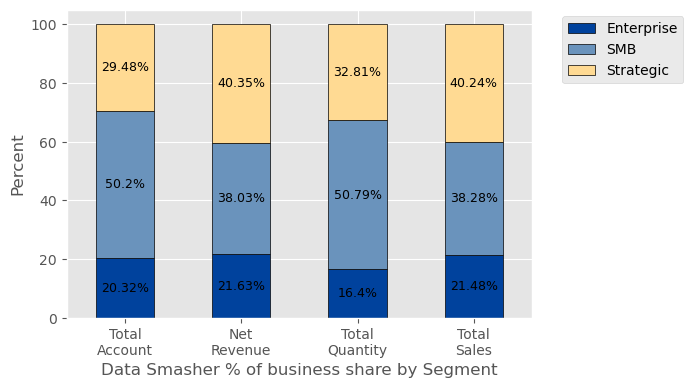

In [38]:
# Segments of Business Share
fig, ax = plt.subplots(figsize = (6, 4))

percents_plot[prod6_plot].plot(kind='bar', ax = ax, stacked=True, color=['#00429d', '#6a93bc', '#ffda93'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Data Smasher % of business share by Segment')
plt.ylabel('Percent')

-  In this chart, Customer accounts, quantity of product purchases, sales, and revenue (sales after discounts are applied) for the "Data Smasher" product in 2023 are summed and calculated into percentages based on 3 customer segmentation categories: Enterprise, SMB, and Strategic. The goal for this is to somewhat "map" the ideal customer profile (looking for underperforming segments, etc) for Data Smasher based on the last year of company activity.
- We can see that despite having 29.48%% of the total accounts, the Strategic segment contribute the highest Net Revenue (40.35%) and Total Sales (40.24%).

([0, 1, 2],
 [Text(0, 0, 'Enterprise'), Text(1, 0, 'SMB'), Text(2, 0, 'Strategic')])

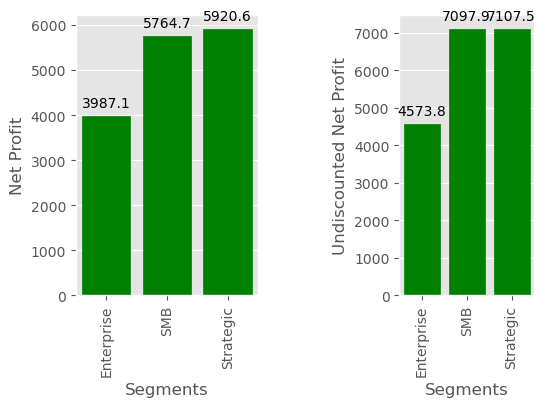

In [39]:
# Data Smasher net profit by Segment vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 3, 1)
net_profit_plot = sns.barplot(x='Segment', y='net_profit', data=prod6_2023_segment)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Segments')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 4, 3)
undiscounted_plot = sns.barplot(x='Segment', y='(net)_profit_before_discount', data=prod6_2023_segment)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Segments')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Strategic Segment has the highest Net Profit (5920.6) and Undiscounted Net Profit (7107.5).
- SMB Segment contributes significantly to Net Profit (5764.7) and Undiscounted Net Profit (7097.9).
- Enterprise Segment has the lowest percentages across all categories but still contributes positively with a Net Profit (3987.1) and Undiscounted Net Profit (4573.8).

Strategic segment stands out as the highest-performing segment for the Data Smasher product, with leading shares in Net Revenue (40.35%) and Total Sales (40.24%), and the highest Net Profit (5920.6) and Undiscounted Net Profit (7107.5). The SMB segment, while having the largest share of Total Accounts (50.2%) and Total Quantity (50.79%), also shows strong financial health with significant net profits. The Enterprise segment, though contributing less compared to the other segments, still shows positive financial contributions.

### Further Inquiries on Segments -----------

In [40]:
# Copy-pasted code for Industry queries within segment
# Industries using Data Smasher within the SMB Segment
prod6_2023_industry_SMB = prod6_2023.query("Segment == 'SMB'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
SMB_account = prod6_2023.query("Segment == 'SMB'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
SMB_account.columns = ['Industry','account']
prod6_2023_percents_SMB = SMB_account.merge(prod6_2023_industry_SMB,how='left',on=['Industry'])
prod6_2023_percents_SMB['% Account']= prod6_2023_percents_SMB['account'] / prod6_2023_percents_SMB['account'].sum() *100
prod6_2023_percents_SMB['% Quantity']= prod6_2023_percents_SMB['Quantity'] / prod6_2023_percents_SMB['Quantity'].sum() *100
prod6_2023_percents_SMB['% Sales']= prod6_2023_percents_SMB['Sales'] / prod6_2023_percents_SMB['Sales'].sum() *100
prod6_2023_percents_SMB['% Net Revenue']= prod6_2023_percents_SMB['discounted_sales'] / prod6_2023_percents_SMB['discounted_sales'].sum() *100  
percents_SMB = prod6_2023_percents_SMB.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_SMB = percents_SMB.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_SMB = percents_SMB.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_SMB = percents_SMB.unstack('Industry')
prod6_SMB = percents_SMB.columns.tolist()
# Industries using Data Smasher within the Strategic Segment
prod6_2023_industry_Strategic = prod6_2023.query("Segment == 'Strategic'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
Strategic_account = prod6_2023.query("Segment == 'Strategic'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
Strategic_account.columns = ['Industry','account']
prod6_2023_percents_Strategic = Strategic_account.merge(prod6_2023_industry_Strategic,how='left',on=['Industry'])
prod6_2023_percents_Strategic['% Account']= prod6_2023_percents_Strategic['account'] / prod6_2023_percents_Strategic['account'].sum() *100
prod6_2023_percents_Strategic['% Quantity']= prod6_2023_percents_Strategic['Quantity'] / prod6_2023_percents_Strategic['Quantity'].sum() *100
prod6_2023_percents_Strategic['% Sales']= prod6_2023_percents_Strategic['Sales'] / prod6_2023_percents_Strategic['Sales'].sum() *100
prod6_2023_percents_Strategic['% Net Revenue']= prod6_2023_percents_Strategic['discounted_sales'] / prod6_2023_percents_Strategic['discounted_sales'].sum() *100  
percents_Strategic = prod6_2023_percents_Strategic.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_Strategic = percents_Strategic.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_Strategic = percents_Strategic.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_Strategic = percents_Strategic.unstack('Industry')
prod6_Strategic = percents_Strategic.columns.tolist()
# Industries using Data Smasher within the Enterprise Segment
prod6_2023_industry_Enterprise = prod6_2023.query("Segment == 'Enterprise'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
Enterprise_account = prod6_2023.query("Segment == 'Enterprise'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
Enterprise_account.columns = ['Industry','account']
prod6_2023_percents_Enterprise = Enterprise_account.merge(prod6_2023_industry_Enterprise,how='left',on=['Industry'])
prod6_2023_percents_Enterprise['% Account']= prod6_2023_percents_Enterprise['account'] / prod6_2023_percents_Enterprise['account'].sum() *100
prod6_2023_percents_Enterprise['% Quantity']= prod6_2023_percents_Enterprise['Quantity'] / prod6_2023_percents_Enterprise['Quantity'].sum() *100
prod6_2023_percents_Enterprise['% Sales']= prod6_2023_percents_Enterprise['Sales'] / prod6_2023_percents_Enterprise['Sales'].sum() *100
prod6_2023_percents_Enterprise['% Net Revenue']= prod6_2023_percents_Enterprise['discounted_sales'] / prod6_2023_percents_Enterprise['discounted_sales'].sum() *100  
percents_Enterprise = prod6_2023_percents_Enterprise.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_Enterprise = percents_Enterprise.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_Enterprise = percents_Enterprise.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_Enterprise = percents_Enterprise.unstack('Industry')
prod6_Enterprise = percents_Enterprise.columns.tolist()

##### SMB Segment Notes

Text(0, 0.5, 'Percent')

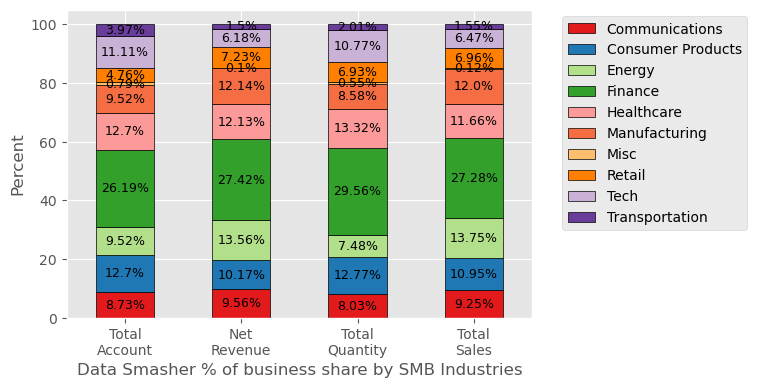

In [41]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_SMB[prod6_SMB].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Data Smasher % of business share by SMB Industries')
plt.ylabel('Percent')

- Finance industry dominates in Total Accounts (26.1%), Net Revenue (28.3%), Total Quantity (22.1%), and Total Sales (28.4%).
- Energy and Manufacturing industries also show significant contributions across multiple categories.
- Consumer Products and Retail have moderate shares across the categories.
- Communications, Tech, and Transportation have lower percentages across most categories.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Misc'),
  Text(7, 0, 'Retail'),
  Text(8, 0, 'Tech'),
  Text(9, 0, 'Transportation')])

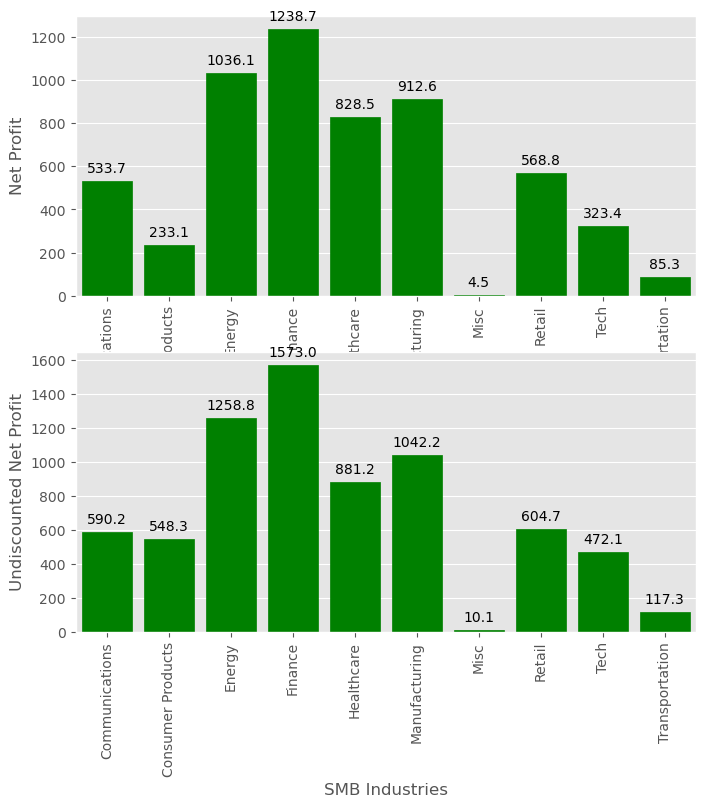

In [42]:
# Data Smasher net profit by SMB Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod6_2023_industry_SMB)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('SMB Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod6_2023_industry_SMB)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('SMB Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Finance dominates with the highest Net Profit (1238.7) and Undiscounted Net Profit (1573.0).
- Energy and Manufacturing also show strong financial performance with Net Profits of 1036.1 and 912.6, respectively, and Undiscounted Net Profits of 1258.8 and 1042.2.
- Healthcare and Retail have significant net profits, contributing positively.
- Tech and Communications industries have moderate net profits.
- Miscellaneous and Transportation industries show weaker financial performance with the lowest net profits.

In the SMB segment for the Data Smasher, the Finance industry leads with 26.1% of Total Accounts, 28.3% of Net Revenue, 22.1% of Total Quantity, and 28.4% of Total Sales, achieving the highest Net Profit (1238.7) and Undiscounted Net Profit (1573.0). Energy and Manufacturing also perform well, significantly contributing to financial health. Healthcare and Retail have substantial net profits, while Tech and Communications show moderate contributions. Miscellaneous and Transportation, however, exhibit weaker financial performance with the lowest net profits.

##### Strategic Segment Notes

Text(0, 0.5, 'Percent')

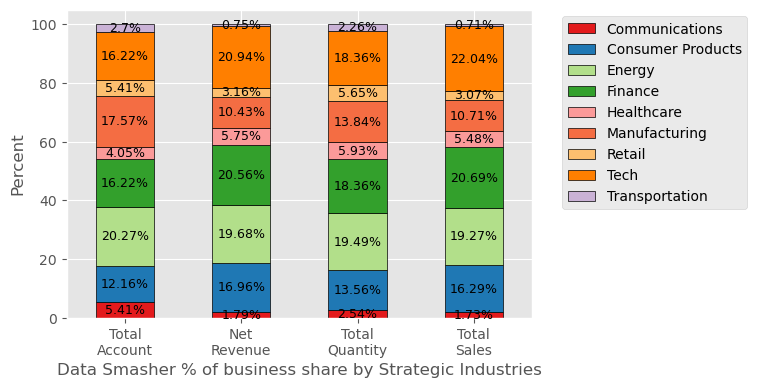

In [43]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_Strategic[prod6_Strategic].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Data Smasher % of business share by Strategic Industries')
plt.ylabel('Percent')

- Tech industry dominates in Net Revenue (20.94%), Total Sales (22.04%), and has a significant share in Total Quantity (18.36%).
- Finance and Energy industries also show strong contributions across multiple categories.
- Consumer Products and Manufacturing have notable shares in Net Revenue and Total Sales.
- Communications, Retail, and Transportation have lower percentages across most categories.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Retail'),
  Text(7, 0, 'Tech'),
  Text(8, 0, 'Transportation')])

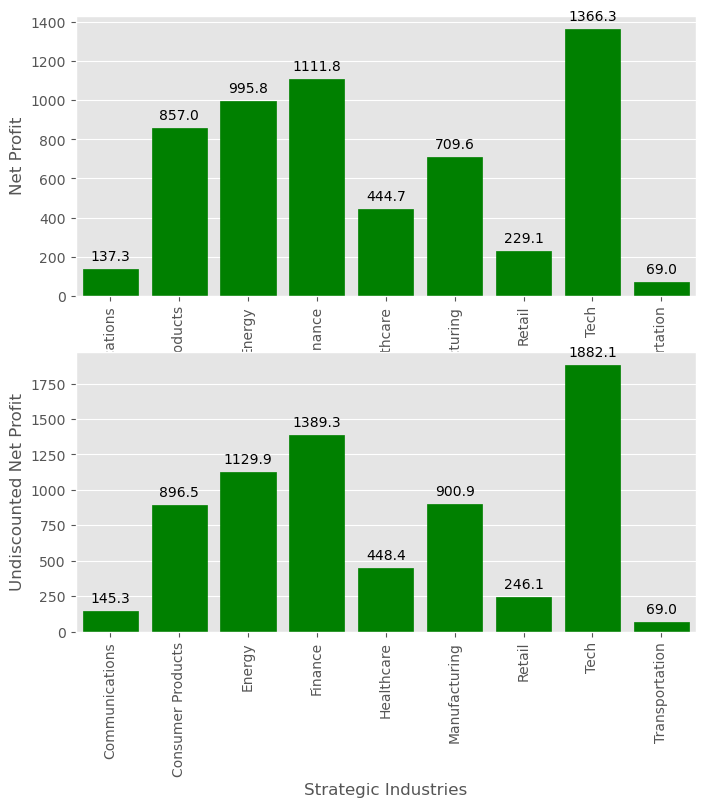

In [44]:
# Data Smasher net profit by Strategic Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod6_2023_industry_Strategic)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Strategic Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod6_2023_industry_Strategic)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Strategic Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Tech and Finance industries dominate with the highest Net Profit (1366.3 and 1111.8) and Undiscounted Net Profit (1882.1 and 1389.3).
- Energy and Consumer Products also show strong financial performance with significant Net and Undiscounted Net Profits.
- Manufacturing and Healthcare have moderate net profits, contributing positively to the segment.
- Retail and Communications industries show weaker financial performance with lower net profits.
- Transportation has the lowest net profits, indicating weaker performance within the Strategic segment.

In the Strategic segment for the Data Smasher, the Tech industry leads, contributing 20.94% of Net Revenue, 22.04% of Total Sales, and 18.36% of Total Quantity, with the highest Net Profit (1366.3) and Undiscounted Net Profit (1882.1). The Finance industry also performs well, with 20.56% of Net Revenue, 18.36% of Total Quantity, and 20.69% of Total Sales, achieving a Net Profit of 1111.8 and an Undiscounted Net Profit of 1389.3. The Energy industry shows strong performance, contributing 19.68% of Net Revenue and 19.27% of Total Sales, with a Net Profit of 995.8 and an Undiscounted Net Profit of 1129.9. Consumer Products and Manufacturing industries contribute positively with moderate net profits. However, Communications, Retail, and Transportation industries exhibit weaker financial performance with the lowest net profits.

##### Enterprise Segment Notes

Text(0, 0.5, 'Percent')

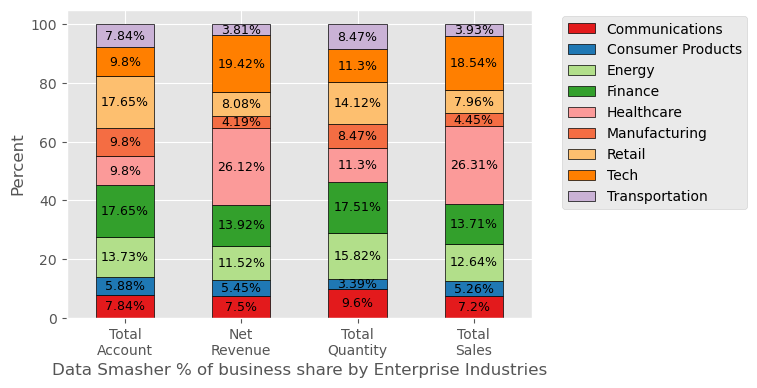

In [45]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_Enterprise[prod6_Enterprise].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Data Smasher % of business share by Enterprise Industries')
plt.ylabel('Percent')

- Healthcare industry dominates in Net Revenue (26.12%) and Total Sales (26.31%).
- Finance and Tech industries also show strong contributions across multiple categories.
- Energy and Retail have notable shares across the categories.
- Communications, Consumer Products, and Manufacturing have lower percentages across most categories.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Retail'),
  Text(7, 0, 'Tech'),
  Text(8, 0, 'Transportation')])

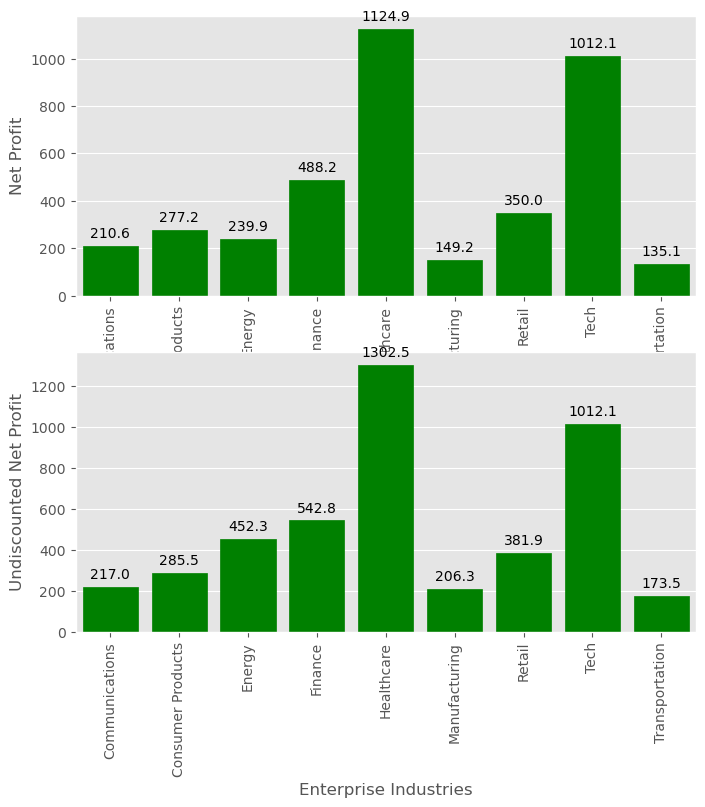

In [46]:
# Data Smasher net profit by Enterprise Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod6_2023_industry_Enterprise)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Enterprise Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod6_2023_industry_Enterprise)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Enterprise Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Healthcare dominates with the highest Net Profit (1124.9) and Undiscounted Net Profit (1362.5).
- Tech and Finance industries also show strong financial performance with significant Net and Undiscounted Net Profits.
- Retail and Consumer Products have moderate net profits, contributing positively.
- Energy shows a significant increase in Undiscounted Net Profit compared to Net Profit.
- Communications, Manufacturing, and Transportation industries show weaker financial performance with lower net profits.

In the Enterprise segment for the Data Smasher, the Healthcare industry leads, contributing 26.12% of Net Revenue and 26.31% of Total Sales, with the highest Net Profit (1124.9) and Undiscounted Net Profit (1362.5). Tech and Finance also perform strongly, enhancing the segment's financial health. Retail and Consumer Products have substantial net profits, while the Energy industry shows a notable increase in undiscounted net profit. However, Communications, Manufacturing, and Transportation exhibit weaker financial performance with the lowest net profits.

**Key findings:**
1. Strategic segment is the top performer, driving 40.35% of net revenue and 40.24% of sales, with a net profit of 5,920.56, even higher at 7,107.47 before discounts. They are financially efficient and impactful. SMBs follow closely, driving 38.03% of net revenue and 38.28% of sales, with a net profit of 5,764.66, even higher at 7,097.87 before discounts. Despite a lead from both segments, Enterprise (21.63% net revenue, 21.48% sales, 3,987.14 net profit) also contributes significantly. Abandoning it could mean lost opportunities. A balanced strategy focusing on the Strategic and SMB segments, while improving the Enterprise segment is the best approach.

### Regional EDA

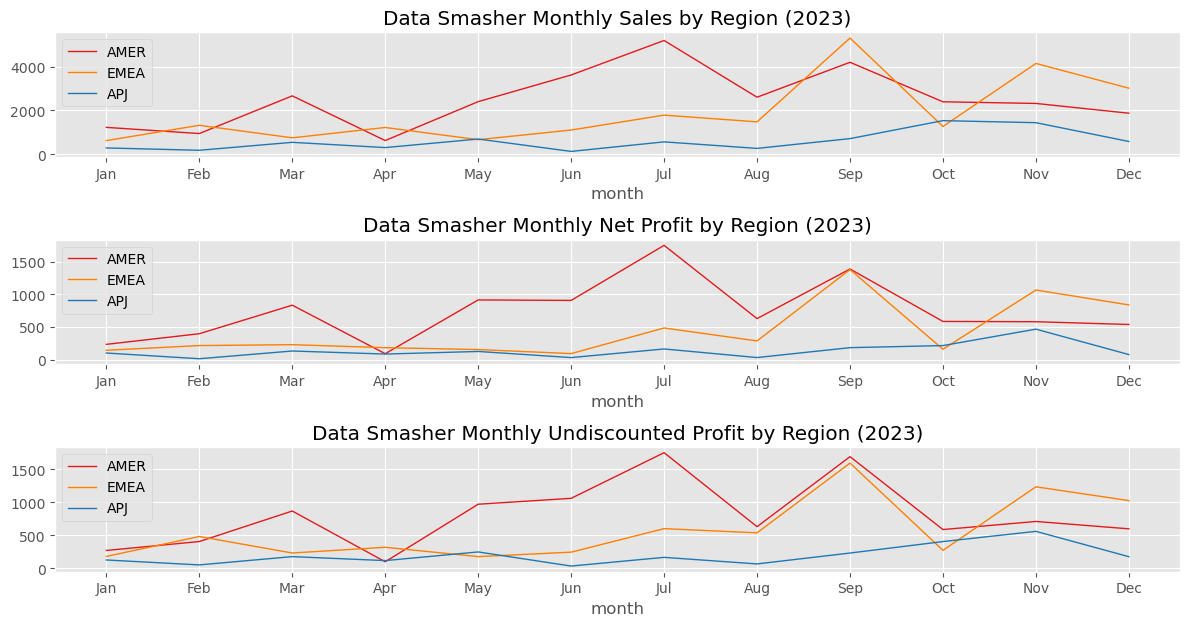

In [9]:
# Data Smasher Monthly Income EDA by Region (2023)
prod6_region_month = prod6_2023.groupby(['Region','month'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
plt.figure(figsize=(12,8))

plt.subplot(411)
prod6_region_month.query("Region == 'AMER'").groupby('month')['Sales'].sum().plot(c='#e31a1c',linewidth=1)
prod6_region_month.query("Region == 'EMEA'").groupby('month')['Sales'].sum().plot(c='#ff7f00',linewidth=1)
prod6_region_month.query("Region == 'APJ'").groupby('month')['Sales'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('Data Smasher Monthly Sales by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])

plt.subplot(412)
prod6_region_month.query("Region == 'AMER'").groupby('month')['net_profit'].sum().plot(c='#e31a1c',linewidth=1)
prod6_region_month.query("Region == 'EMEA'").groupby('month')['net_profit'].sum().plot(c='#ff7f00',linewidth=1)
prod6_region_month.query("Region == 'APJ'").groupby('month')['net_profit'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('Data Smasher Monthly Net Profit by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])

plt.subplot(413)
prod6_region_month.query("Region == 'AMER'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#e31a1c',linewidth=1)
prod6_region_month.query("Region == 'EMEA'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#ff7f00',linewidth=1)
prod6_region_month.query("Region == 'APJ'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('Data Smasher Monthly Undiscounted Profit by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])


plt.tight_layout()
plt.show()

Monthly Regional Performance

All three regions—AMER, EMEA, and APJ—show significant variability in sales and net profits, with specific peak months like July for AMER, September for EMEA, and November for APJ.
- AMER region peaks in March, July, and September but faces low performance in April and December, with discounts significantly impacting profits. This highlights inconsistent monthly performance, emphasizing July's standout success.
- EMEA region peaks in September and November, with significant variability in other months. Notable dips in April, June, October, and December suggest targeted strategies are needed. Discounts notably impact February and June profits.
- APJ region generally shows lower sales and net profits compared to the AMER and EMEA regions. High-performing months like October and November stand out, but the overall performance is inconsistent, with significant dips in February and June.

Performance Highlights
- Highest Sales: In EMEA, September shows the highest sales of 5313.1500.
- Highest Net Profit: The highest net profit is seen in AMER in July, with a net profit of 1748.5216.
- Highest Undiscounted Profit: EMEA in September, at 1590.9284.


In [9]:
prod6_region_month

,Region,month,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,AMER,1,17,1224.4400,1190.8480,266.7728,233.1808
1,AMER,2,8,941.4820,935.0836,402.2779,395.8795
2,AMER,3,37,2666.7140,2634.7172,864.5628,832.5660
3,AMER,4,22,621.4700,616.0460,95.5395,90.1155
4,AMER,5,37,2401.7680,2347.3744,967.5841,913.1905
5,AMER,6,54,3622.2440,3471.0952,1056.8642,905.7154
6,AMER,7,29,5201.6700,5201.6700,1748.5216,1748.5216
7,AMER,8,22,2603.9500,2603.9500,627.4059,627.4059
8,AMER,9,50,4204.0580,3902.3684,1688.4827,1386.7931
9,AMER,10,48,2394.7300,2394.7300,583.8411,583.8411


([0, 1, 2], [Text(0, 0, 'AMER'), Text(1, 0, 'APJ'), Text(2, 0, 'EMEA')])

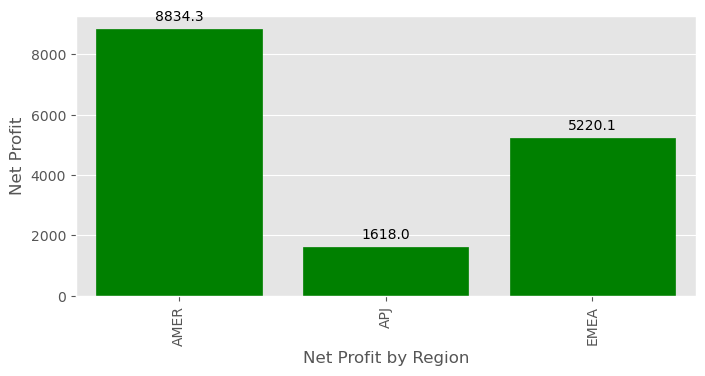

In [10]:
prod6_region = prod6_2023.groupby(['Region'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Region', y='net_profit', data=prod6_region)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Net Profit by Region')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

In [11]:
prod6_region

,Region,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,AMER,462,30074.8300,29306.0060,9603.0770,8834.2530
1,APJ,174,7194.8440,6495.2312,2317.6410,1618.0282
2,EMEA,443,22676.5580,21038.2204,6858.4134,5220.0758


High-Performing Region
- AMER stands out as the top-performing region with the highest sales and net profits. It managed to achieve significant positive profits even before discounts.

Moderate Performance
- EMEA contributes substantial sales and net profits, showing strong performance during peak months.

Lowest Performing Region
- APJ generally shows lower sales and net profits compared to AMER and EMEA.

In [13]:
grouped = prod6_2023.groupby(['Region', 'Segment', 'Industry'])
total_sales = grouped['Sales'].sum()
total_profit_before_discounts = grouped['(net)_profit_before_discount'].sum()
total_profit = grouped['net_profit'].sum()
avg_sales_per_order = grouped['Sales'].mean()
avg_discount = grouped['Discount'].mean()
profit_margin = (total_profit / total_sales) * 100

In [14]:
metrics = pd.DataFrame({
    'total_sales': total_sales,
    'avg_sales_per_order': avg_sales_per_order,
    'total_profit': total_profit,
    'total_profit before discounts':total_profit_before_discounts,
    'avg_discount': avg_discount,
    'profit_margin': profit_margin
}).reset_index()

metrics_sorted = metrics.sort_values(by=['Region', 'Segment', 'Industry'])

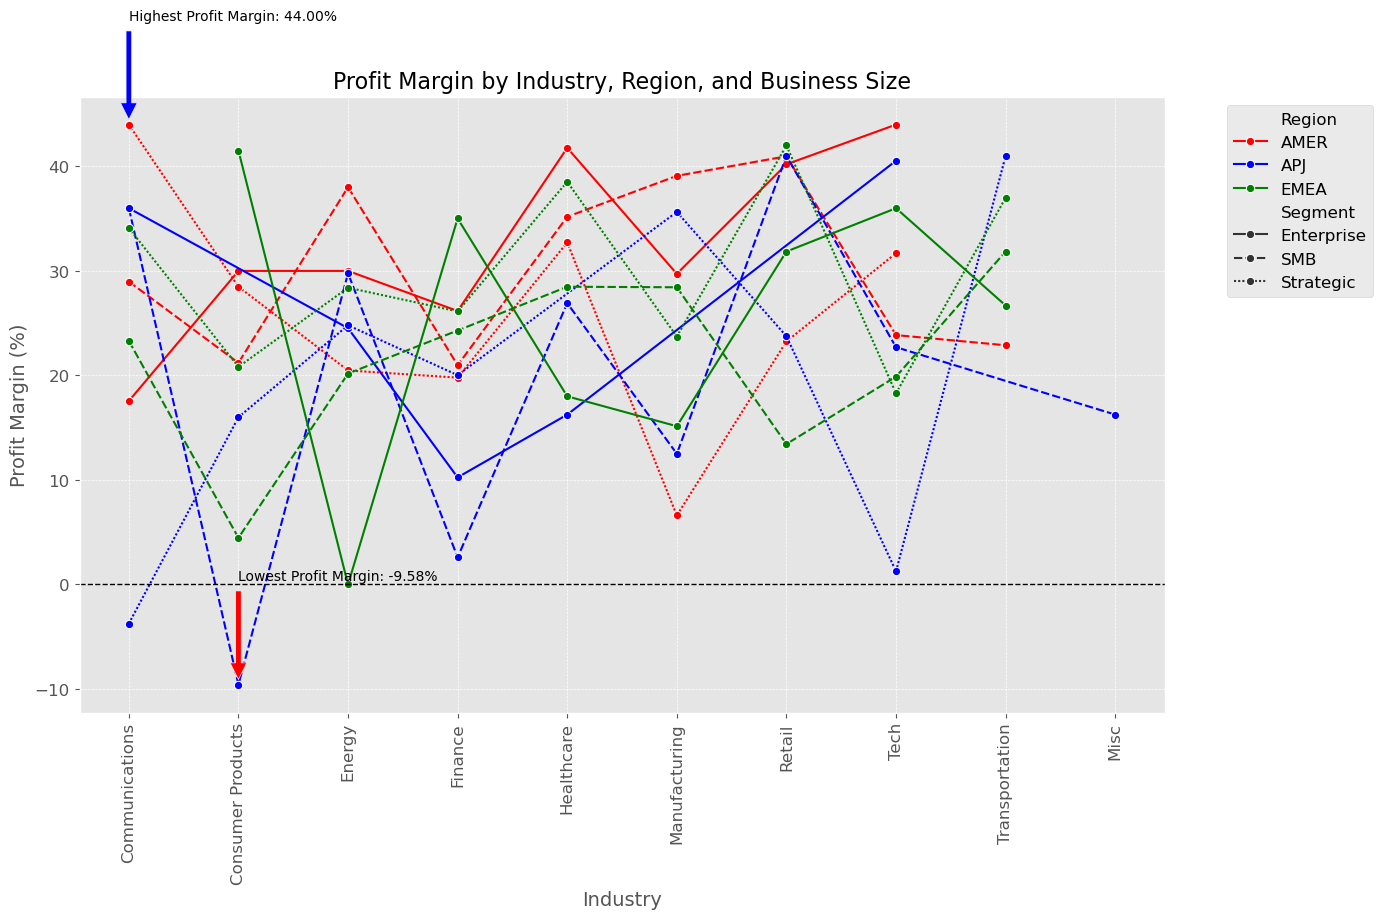

In [16]:
# Cross-segment line chart

# Define the color palette
palette = {
    'AMER': 'red',
    'EMEA': 'green',
    'APJ': 'blue'
}

plt.figure(figsize=(14, 8))
sns.lineplot(data=metrics_sorted, x='Industry', y='profit_margin', hue='Region', style='Segment', marker='o', palette=palette)
plt.title('Profit Margin by Industry, Region, and Business Size', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Profit Margin (%)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)

# Add a black grid line at y=0
plt.axhline(0, color='black', linewidth=1, linestyle='--')


# Highlight highest and lowest profit margins
max_profit = metrics_sorted['profit_margin'].max()
min_profit = metrics_sorted['profit_margin'].min()
max_profit_industry = metrics_sorted.loc[metrics_sorted['profit_margin'] == max_profit, 'Industry'].values[0]
min_profit_industry = metrics_sorted.loc[metrics_sorted['profit_margin'] == min_profit, 'Industry'].values[0]

plt.annotate(
    f'Highest Profit Margin: {max_profit:.2f}%', 
    xy=(max_profit_industry, max_profit), 
    xytext=(max_profit_industry, max_profit + 10), 
    arrowprops=dict(facecolor='blue', shrink=0.05)
)

plt.annotate(
    f'Lowest Profit Margin: {min_profit:.2f}%', 
    xy=(min_profit_industry, min_profit), 
    xytext=(min_profit_industry, min_profit + 10), 
    arrowprops=dict(facecolor='red', shrink=0.05)
)

# Move legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


We can quickly observe that only two industries contribute to a negative profit margin for Data Smasher: APJ's Consumer Products industries in the SMB segment, with the lowest profit margin at -9.58%, and APJ's Communications industries in the Strategic segment.

In [17]:
# Calculating the total profit for each group
total_profit = grouped['net_profit'].sum()
avg_discount = grouped['Discount'].mean()
# Creating a DataFrame to store the metrics
metrics = pd.DataFrame({
    'total_profit': total_profit,
    'avg_discount': avg_discount
}).reset_index()
# Filtering the metrics to show only the positive profits
positive_profit_metrics = metrics[metrics['total_profit'] > 0]
# Sorting the metrics DataFrame by Region, Segment, and Industry
metrics_sorted = positive_profit_metrics.sort_values(by=['Region', 'Segment', 'Industry'])

In [18]:
###Filter positive profits (SMB)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the SMB segment
smb_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'SMB')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
smb_positive_profit_metrics = smb_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

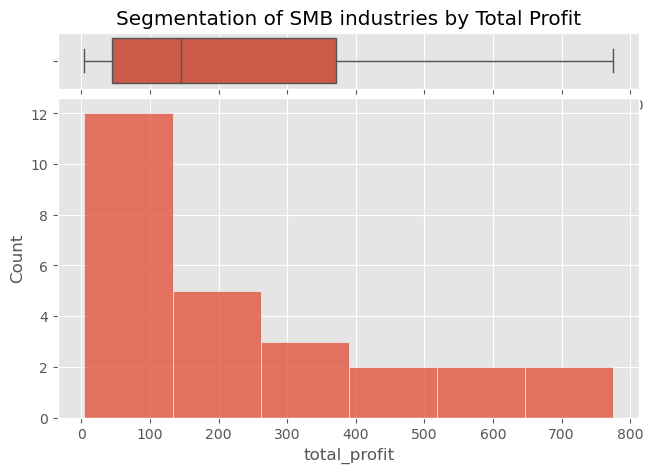

0.0000     4.5201
0.2500    45.3775
0.5000   145.7684
0.7500   371.4675
1.0000   774.8277
Name: total_profit, dtype: float64
Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 371.47 in profit
- 3 (Good) : Contributes between 145.77 and 371.47 in profit
- 2 (Marginal) : Contributes between 45.38 and 145.77 in profit
- 1 (Underperforming) : Contributes less than 45.38 in profit


In [19]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=smb_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=smb_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of SMB industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = smb_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [20]:
smb_positive_profit_metrics['segmentation score'] = pd.qcut(
    smb_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

smb_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
10,AMER,SMB,Energy,774.8277,0.0400,4
11,AMER,SMB,Finance,677.7703,0.0364,4
13,AMER,SMB,Manufacturing,549.7508,0.0000,4
58,EMEA,SMB,Finance,540.0510,0.0400,4
14,AMER,SMB,Retail,486.2248,0.0000,4
12,AMER,SMB,Healthcare,396.5426,0.0000,4
55,EMEA,SMB,Communications,379.6704,0.1000,4
60,EMEA,SMB,Manufacturing,346.8587,0.1200,3
59,EMEA,SMB,Healthcare,279.2982,0.0857,3
9,AMER,SMB,Consumer Products,170.3276,0.0750,3


In [21]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = smb_positive_profit_metrics[smb_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the SMB segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these SMB industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese SMB industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")


Energy in AMER, Finance in AMER, Manufacturing in AMER, Finance in EMEA, Retail in AMER, Healthcare in AMER, Communications in EMEA are the highest performing industries in the SMB segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Manufacturing in EMEA, Healthcare in EMEA, Consumer Products in AMER, Healthcare in APJ, Energy in EMEA, Tech in EMEA all maintain solid profitability.
While not the highest-performing, these SMB industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Tech in AMER, Energy in APJ, Communications in AMER, Consumer Products in EMEA, Transportation in AMER, Communications in APJ, Retail in EMEA, Retail in APJ, Tech in APJ, Finance in APJ, Manufacturing in APJ, Transportation in EMEA, Misc in APJ are und

In [25]:
###Filter positive profits (Strategic)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the strategic segment
strategic_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'Strategic')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
strategic_positive_profit_metrics = strategic_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

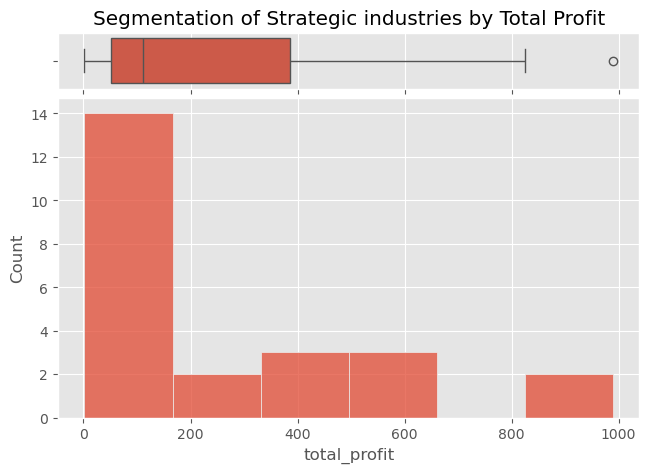

0.0000     1.7995
0.2500    50.8076
0.5000   110.5937
0.7500   385.9094
1.0000   989.2250
Name: total_profit, dtype: float64
Based on the distribution above, we will group Strategic industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 385.91 in profit
- 3 (Good) : Contributes between 110.59 and 385.91 in profit
- 2 (Marginal) : Contributes between 50.81 and 110.59 in profit
- 1 (Underperforming) : Contributes less than 50.81 in profit


In [26]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=strategic_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=strategic_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of Strategic industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = strategic_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group Strategic industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [27]:
strategic_positive_profit_metrics['segmentation score'] = pd.qcut(
    strategic_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

strategic_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
24,AMER,Strategic,Tech,989.2250,0.0857,4
19,AMER,Strategic,Energy,825.9146,0.0727,4
20,AMER,Strategic,Finance,549.7394,0.0000,4
65,EMEA,Strategic,Consumer Products,509.4312,0.1333,4
67,EMEA,Strategic,Finance,508.9755,0.0800,4
43,APJ,Strategic,Manufacturing,417.9396,0.0500,4
71,EMEA,Strategic,Tech,375.2326,0.0667,3
21,AMER,Strategic,Healthcare,365.8484,0.1000,3
69,EMEA,Strategic,Manufacturing,275.1813,0.0857,3
18,AMER,Strategic,Consumer Products,252.3759,0.0000,3


In [28]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = strategic_positive_profit_metrics[strategic_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the Strategic segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these Strategic industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese Strategic industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")

Tech in AMER, Energy in AMER, Finance in AMER, Consumer Products in EMEA, Finance in EMEA, Manufacturing in APJ are the highest performing industries in the Strategic segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Tech in EMEA, Healthcare in AMER, Manufacturing in EMEA, Consumer Products in AMER, Energy in EMEA, Retail in EMEA all maintain solid profitability.
While not the highest-performing, these Strategic industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Consumer Products in APJ, Communications in EMEA, Retail in AMER, Healthcare in EMEA, Transportation in APJ, Finance in APJ, Communications in AMER, Energy in APJ, Retail in APJ, Manufacturing in AMER, Transportation in EMEA, Tech in APJ are underperforming.
Thes

In [29]:
###Filter positive profits (Enterprise)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the Enterprise segment
enterprise_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'Enterprise')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
enterprise_positive_profit_metrics = enterprise_positive_profit_metrics.sort_values(by='total_profit', ascending=False)
enterprise_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount
4,AMER,Enterprise,Healthcare,929.2634,0.0667
7,AMER,Enterprise,Tech,769.4588,0.0000
49,EMEA,Enterprise,Finance,275.8941,0.0000
47,EMEA,Enterprise,Consumer Products,266.2719,0.1000
52,EMEA,Enterprise,Retail,236.7833,0.0667
3,AMER,Enterprise,Finance,184.3794,0.0000
26,APJ,Enterprise,Energy,154.4047,0.0500
54,EMEA,Enterprise,Transportation,135.0982,0.0500
53,EMEA,Enterprise,Tech,129.6000,0.0000
28,APJ,Enterprise,Healthcare,128.6805,0.2000


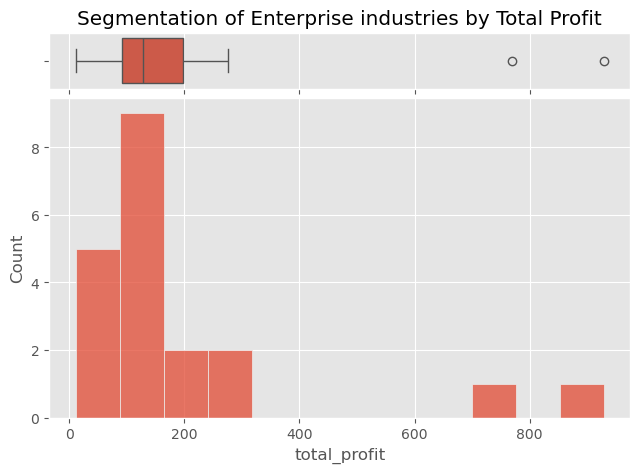

0.0000    10.8960
0.2500    91.2757
0.5000   128.0791
0.7500   197.4804
1.0000   929.2634
Name: total_profit, dtype: float64
Based on the distribution above, we will group Enterprise industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 197.48 in profit
- 3 (Good) : Contributes between 128.08 and 197.48 in profit
- 2 (Marginal) : Contributes between 91.28 and 128.08 in profit
- 1 (Underperforming) : Contributes less than 91.28 in profit


In [30]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=enterprise_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=enterprise_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of Enterprise industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = enterprise_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group Enterprise industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [31]:
enterprise_positive_profit_metrics['segmentation score'] = pd.qcut(
    enterprise_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

enterprise_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
4,AMER,Enterprise,Healthcare,929.2634,0.0667,4
7,AMER,Enterprise,Tech,769.4588,0.0000,4
49,EMEA,Enterprise,Finance,275.8941,0.0000,4
47,EMEA,Enterprise,Consumer Products,266.2719,0.1000,4
52,EMEA,Enterprise,Retail,236.7833,0.0667,4
3,AMER,Enterprise,Finance,184.3794,0.0000,3
26,APJ,Enterprise,Energy,154.4047,0.0500,3
54,EMEA,Enterprise,Transportation,135.0982,0.0500,3
53,EMEA,Enterprise,Tech,129.6000,0.0000,3
28,APJ,Enterprise,Healthcare,128.6805,0.2000,3


In [32]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = enterprise_positive_profit_metrics[enterprise_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the Enterprise segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these Enterprise industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese Enterprise industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")


Healthcare in AMER, Tech in AMER, Finance in EMEA, Consumer Products in EMEA, Retail in EMEA are the highest performing industries in the Enterprise segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Finance in AMER, Energy in APJ, Transportation in EMEA, Tech in EMEA, Healthcare in APJ all maintain solid profitability.
While not the highest-performing, these Enterprise industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Manufacturing in AMER, Communications in AMER, Retail in AMER, Tech in APJ, Communications in APJ, Energy in AMER, Healthcare in EMEA, Finance in APJ, Manufacturing in EMEA, Consumer Products in AMER are underperforming.
These Enterprise industries struggle with profitability and should be approached with 

**Key findings:**
1. AMER stands out with the highest sales and net profits, managing significant positive profits even before discounts.
2. EMEA contributes substantial sales and net profits, showing strong performance during peak months but requires targeted strategies to address variability and discount impacts.
3. APJ generally shows lower sales and net profits compared to AMER and EMEA, with inconsistent performance and notable dips in February and June.
4. In the Strategic segment, Tech in AMER, Energy in AMER, Finance in AMER, Consumer Products in EMEA, Finance in EMEA, Manufacturing in APJ are the highest performing industries. They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.
5. For the SMB segment, Energy in AMER, Finance in AMER, Manufacturing in AMER, Finance in EMEA, Retail in AMER, Healthcare in AMER, and Communications in EMEA are top-performing. In the Enterprise segment, Healthcare in AMER, Tech in AMER, Finance in EMEA, Consumer Products in EMEA, and Retail in EMEA stand out.
